<a href="https://colab.research.google.com/github/Noam-and-Iftach/DS20936/blob/main/Recommendation_System_for_Amazon's_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System for Amazon's Books

### Introduction
We are Noam Ophir (209374362) and Iftach Hivner (066542408), final-year students with a strong aspiration to pursue careers as data scientists. In our pursuit of a dataset that encapsulates the multifaceted challenges of data science, we identified a rich repository of Amazon product reviews. This discovery piqued our interest, leading us to center our project on the development of a recommendation system utilizing these reviews. Our goal is to explore and apply advanced data science techniques to generate valuable insights and personalized recommendations, ultimately enhancing the user experience on e-commerce platforms.

### The Problem
Our motivation for undertaking this project stems from a desire to delve into the realm of recommendation systems—a domain in which we previously had limited exposure—and to improve the user experience on e-commerce platforms. While Amazon has its own proprietary recommendation system, the specifics of its operation remain unknown to us, as do the extensive details of user behavior and other data, beyond what is publicly accessible.

Thus, we set out to design a personalized recommendation system tailored for Amazon users. Our objective is to assist users in discovering products that align with their interests. Traditional search methods often fall short, lacking the degree of personalization that can significantly enhance user satisfaction.

By leveraging user behavior data, performing sentiment analysis on review texts, and on products categories, our recommendation system aims to offer highly relevant suggestions. This project not only addresses a pertinent problem but also serves as an opportunity for us to deepen our understanding of this dynamic field of data science, master the challenges of working with big data, and broaden our professional horizons

### The data
To obtain the data for our project, we searched the internet for relevant databases. We found suitable datasets at [UC San Diego's Amazon product dataset](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/). This dataset, which has been used in several published research papers, comprises a vast collection of Amazon product reviews that had already been scraped and made publicly available by the authors.

Given the extensive scope of the data, which encompasses a wide range of products across the entire Amazon platform, we decided to narrow our focus to the books category—a domain of personal interest for both of us. This focus enables us to delve deeper into the nuances of book recommendations while managing the complexity of working with such a large dataset.

## Exploratory Data Analysis

First, we obtained the relevant data from the aforementioned website. Next, we will conduct an exploratory data analysis to gain a deeper understanding of the dataset and its structure.



In [ ]:
import pandas as pd
import json
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

The original JSON files were exceedingly large, making it impractical to load and display all the data simultaneously. To manage this, we downloaded the files and converted them into Parquet format, which significantly enhanced processing efficiency. Our initial approach involved working with both the books and Kindle recommendations datasets, supplemented by metadata files that had been scraped by researchers.

Below are samples from each dataset, illustrating the structure and content we worked with. Even at this early stage, we encountered issues with excessive RAM usage, necessitating a line-by-line reading of the files to avoid overloading our system.

In [ ]:
#showing random samples from the json
file_path = '/content/drive/MyDrive/Books1.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:
    # Read the file line by line to avoid loading the entire file into memory
    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0      5.0     False  08 12, 2005  A1C6M8LCIX4M6M  0001713353   
1      5.0      True   10 6, 2016   A2CVLIZ9ELU88  0001061240   
2      5.0     False  08 28, 2014  A3S62U3MSPH202  0002005263   
3      5.0      True  03 29, 2017   AFS2HI8Y67T6J  0001384198   
4      3.0      True   01 7, 2014  A331AFVDOICK1E  0001384198   

                                   style     reviewerName  \
0              {'Format:': ' Paperback'}         June Bug   
1              {'Format:': ' Hardcover'}           A.M.H.   
2  {'Format:': ' Mass Market Paperback'}         L. Busse   
3              {'Format:': ' Hardcover'}  Amazon Customer   
4              {'Format:': ' Paperback'}         PinkBird   

                                          reviewText  \
0  This book is a winner with both of my boys.  T...   
1  I had this book as a child and loved it. The c...   
2                                I enjoy these books   
3  Great classic book!  I gave this as a shower g...   
4  I bough this to help my train-loving child wit...   

                                             summary  unixReviewTime  
0                                Children's favorite      1123804800  
1  A wonderful poetry collection with superior co...      1475712000  
2                                         Five Stars      1409184000  
3                                         Five Stars      1490745600  
4                     It's Ok, Not the Best ABC Book      1389052800

The JSON file is organized in a structured manner, containing several key columns:

**overall**: This column represents the rating, ranging from 1 to 5, in integer format.

**verified**: Indicates whether the review is from a verified purchase.

**reviewTime**: The date when the review was posted.

**reviewerID**: A unique identifier for the reviewer.

**asin**: The Amazon Standard Identification Number for the product.

**style**: Describes the format of the product, such as 'Paperback' or 'Kindle Edition.'

**reviewerName**: The name of the reviewer.

**reviewText**: The actual content of the review.

**summary**: A brief summary of the review.

**unixReviewTime**: The date of the review in Unix time format.



Next, we will examine some examples of the metadata associated with this dataset.

In [ ]:
file_path = '/content/drive/MyDrive/meta_Books.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)


category tech1  \
0                                                 []         
1                                                 []         
2                          [Books, Children's Books]         
3  [Books, Biographies & Memoirs, Travelers & Exp...         
4                  [Books, Christian Books & Bibles]         

                                         description fit  \
0  [It is a biology book with God&apos;s perspect...       
1                                                 []       
2  [Another popular character makes an appearance...       
3                [The Picnic & Suchlike Pandemonium]       
4                                [1977 publish date]       

                                               title  \
0  Biology Gods Living Creation Third Edition 10 ...   
1  Bloomberg Businessweek Magazine (April 1, 2013...   
2                     Pookie Believes in Santa Claus   
3              The Picnic &amp; Suchlike Pandemonium   
4                                  Jesus of Nazareth   

                                            also_buy tech2  \
0  [0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...         
1                                                 []         
2               [1872885012, 1872885004, 1872885373]         
3                                       [161145865X]         
4   [0060697806, B0182W7JZ6, 0664258077, 0687365902]         

                                 brand feature                   rank  \
0                         Keith Graham      []   1,349,781 in Books (   
1                       Josh Tyrangiel      []  12,376,506 in Books (   
2                          Ivy Wallace      []   2,047,631 in Books (   
3   Visit Amazon's Gerald Durrell Page      []   1,913,645 in Books (   
4  Visit Amazon's William Barclay Page      []     397,999 in Books (   

                                           also_view main_cat similar_item  \
0  [0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...    Books                
1                                                 []    Books                
2  [1872885004, B000MTD6ZK, 0006647324, B000MHT4K...    Books                
3  [0142004413, 161145865X, 1509827137, 156792441...    Books                
4                                       [B000GLU64I]    Books                

  date    price        asin imageURL imageURLHighRes  
0        $39.94  0000092878       []              []  
1         $3.25  000077135X       []              []  
2                0001983806       []              []  
3       $147.77  000216731X       []              []  
4        $16.99  000250653X       []              []

The metadata JSON file, while somewhat unstructured, provides valuable information across several columns:

**category**: Lists the categories the book belongs to.

**tech1 and tech2**: Technical details or specifications (mostly empty).

**description**: A description that also contains reviews of the book.

**fit**: Compatibility or fit information, if applicable (mostly empty).

**title**: The title of the book.

**also_buy**: A list of ASINs for items frequently bought together with this book.

**brand**: The name of the author in multiple formats.

**feature**: features of the book (mostly empty).

**rank**: The book's rank in its main category.

**also_view**: A list of ASINs for items frequently viewed together with this book.

**main_cat**: The main category of the product in amazon (mostly books in our case).

**similar_item**: Items similar to the book (mostly empty).

**date**: The publication date of the book (mostly empty).

**price**: The price of the book.

**asin**: The Amazon Standard Identification Number for the book.

**imageURL and imageURLHighRes**: URLs for images of the book in standard and high resolution (mostly empty).

The **also_view** and **also_buy** columns provide item-based recommendations, with the former showing items frequently viewed together and the latter indicating items frequently bought together.

Next, We will examine the kindle files in the same manner.

In [ ]:
file_path = '/content/drive/MyDrive/Kindle_Store.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:

    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)


overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  12 29, 2012  A27UD5HYAKBL97  1423600150   
1      5.0      True  09 16, 2013  A3O71TSZWGVPJR  B000FA64QO   
2      1.0     False  02 13, 2003  A33ZYFE8XMKKR1  B000FA5KX2   
3      3.0      True  08 22, 2016  A27FRLI7PFQP37  B000FBFMHU   
4      4.0      True   08 7, 2003  A213YFL3NCBSSL  B000FBFMHU   

                            style   reviewerName  \
0       {'Format:': ' Hardcover'}         Cheryl   
1  {'Format:': ' Kindle Edition'}  Freddy Godden   
2       {'Format:': ' Hardcover'}  P. Scott Pope   
3                             NaN      H. Natola   
4                             NaN       J Zimmer   

                                          reviewText  \
0  If you like making salsas this is a great book...   
1  It's been a long time since I read The New Jed...   
2  There is very little information in this book ...   
3  Up bought this book many years after seeing th...   
4  Frank Abagnale has had an extradordinary life,...   

                                 summary  unixReviewTime vote  
0                             Great Book      1356739200  NaN  
1                          A good filler      1379289600  NaN  
2                                  Avoid      1045094400   10  
3                       Interesting read      1471824000  NaN  
4  Read for the adventure not the dialog      1060214400  NaN

This file is quite similar to the previous one, but we immediately noticed integrity issues in the "style" column, which should exclusively contain Kindle formats. We will explore this discrepancy in more detail later. Additionally, this file introduces a new feature not present in the books.json: the "vote" column, which indicates whether users found a review helpful.

Next, we proceed to examine the metadata for Kindle.

In [ ]:
file_path = '/content/drive/MyDrive/meta_Kindle_Store.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:

    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)

category tech1 description fit  \
0  [Kindle Store, Kindle eBooks, Science Fiction ...                []       
1  [Kindle Store, Kindle eBooks, Literature & Fic...                []       
2  [Kindle Store, Kindle eBooks, Science Fiction ...                []       
3  [Kindle Store, Kindle eBooks, Literature & Fic...                []       
4  [Kindle Store, Kindle eBooks, Literature & Fic...                []       

  title                                           also_buy tech2  \
0                                 [B007NLCJBC, B01FARODH8]         
1        [B000JMKNQ0, B00A9ET67K, B000FA64PK, B000FC1BN...         
2                                                       []         
3                                                       []         
4         [B001CQCAOU, B000SWV6H6, B000SWV6FS, B073P6H5VX]         

                                   brand feature  \
0                       Arthur K. Barnes      []   
1                           Troy Denning      []   
2                          Stephen Adams      []   
3  Visit Amazon's Wendy Etherington Page      []   
4        Visit Amazon's Emilie Rose Page      []   

                               rank                 also_view  \
0  1,716,849 Paid in Kindle Store (  [B000FBF81K, B00PBDMER8]   
1    450,206 Paid in Kindle Store (                        []   
2  3,391,942 Paid in Kindle Store (                        []   
3  2,695,514 Paid in Kindle Store (                        []   
4    674,441 Paid in Kindle Store (              [B000SWV6H6]   

                                             details      main_cat  \
0  {'File Size:': '295 KB', 'Print Length:': '113...  Buy a Kindle   
1  {'File Size:': '1029 KB', 'Print Length:': '10...  Buy a Kindle   
2  {'File Size:': '550 KB', 'Print Length:': '242...  Buy a Kindle   
3  {'File Size:': '479 KB', 'Print Length:': '256...  Buy a Kindle   
4  {'File Size:': '377 KB', 'Print Length:': '192...  Buy a Kindle   

  similar_item date price        asin imageURL imageURLHighRes  
0                          B000FA5KKA       []              []  
1                          B000FBFMVG       []              []  
2                          B000FC1QW4       []              []  
3                          B000MAH9X4       []              []  
4                          B000RH0CQI       []              []

The file is quite similar to the other meta data file we have already encountered

The next step involves splitting the files into smaller parts or chunks to facilitate working with the data without needing to load all of it at once. We applied this approach to all four files: meta_Books.json, Books.json, meta_Kindle_Store.json, and Kindle_store.json. This allowed us to efficiently manage the large datasets and perform our analyses without overwhelming system resources.

In [ ]:
# Input and output file paths
json_file_path = '/content/drive/MyDrive/Books2.json'
parquet_output_dir = '/content/drive/MyDrive/books-parquet/'

chunk_size = 50000
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

for i, chunk in enumerate(json_reader):
    table = pa.Table.from_pandas(chunk)
    parquet_file_name = f'output_chunk_{i + 1}.parquet'
    parquet_file_path = f'{parquet_output_dir}{parquet_file_name}'
    pq.write_table(table, parquet_file_path)

print(f"Data has been successfully converted to Parquet: {parquet_file_path}")

For the metadata files, we first converted them into CSV format before further converting them into Parquet files. This process was more challenging than writing plain code, as certain characters caused issues during the conversion. To handle these difficulties, we implemented a 'try-except' approach, allowing us to manage errors gracefully and ensure the successful conversion of the files.

In [ ]:
import pandas as pd

json_file_path = '/content/drive/MyDrive/meta_Books.json'
csv_output_path = '/content/drive/MyDrive/meta-books-csv/'

# Read the JSON file in chunks with error handling and potential escape fixes
chunksize = 20000
chunk_counter = 1

try:
    for chunk in pd.read_json(json_file_path, lines=True, chunksize=chunksize):
        if chunk_counter%200==0:
          print("Current chunk is:", chunk_counter)
        processed_chunk = chunk
        output_filename = f'meta-books-csv-chunk_{chunk_counter}.csv'
        output_filepath = f'{csv_output_path}{output_filename}'

        try:
            processed_chunk.to_csv(output_filepath, index=False, quoting=csv.QUOTE_ALL, escapechar='\\')
            chunk_counter += 1
        except pd.errors.ParserError as e:
            print(f"Error processing chunk {chunk_counter}: {e}")

except pd.errors.ParserError as e:
    print("Error decoding JSON:", e)


The same conversion process was applied to the Kindle files as well.

In [ ]:
import os
from pathlib import Path

csv_directory = '/content/drive/MyDrive/meta-books-csv/'
parquet_directory = '/content/drive/MyDrive/meta-books-parquet/'
Path(parquet_directory).mkdir(parents=True, exist_ok=True)
csv_files = [file for file in os.listdir(csv_directory) if file.startswith('meta-books-csv') and file.endswith('.csv')]
counter=0

for csv_file in csv_files:
    counter+=1
    df = pd.read_csv(os.path.join(csv_directory, csv_file))
    parquet_file = os.path.join(parquet_directory, csv_file.replace('.csv', '.parquet'))
    df.to_parquet(parquet_file, engine='pyarrow')

# *Initial Steps with the Data*
We started by taking the first steps in working with the dataset. This phase involves understanding the structure of the data, identifying any immediate issues, and preparing it for the analysis that will follow. This foundational work is essential to ensure a smooth and effective data exploration process later on.

The first step in our analysis was to assess the basic characteristics of the dataset, focusing on the summaries and review texts. Specifically, we counted the number of summaries, measured their lengths, and performed the same analysis for the review texts. Given that the dataset consists of book reviews, starting with these features was a logical choice. Since this process is more technical in nature, we opted not to include the detailed code within this notebook. Instead, we concentrated on extracting and understanding these key features before moving forward.

In [ ]:
df_summary=pd.read_parquet("/content/drive/MyDrive/summary_only.parquet")

**Analyzing the Distribution of Voting**

Next, we will examine the distribution of votes in the dataset. This step is crucial to understanding how users have interacted with the reviews, particularly in terms of upvotes or downvotes, which can offer insights into the perceived helpfulness or relevance of the reviews. By analyzing the voting distribution, we can better understand patterns of user engagement and the overall dynamics of the review system.


In [ ]:
base_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_"
extension = ".parquet"

# Number of files
num_files = 7
# Initialize an empty DataFrame to store the results
all_data = pd.DataFrame()
# Loop through the file numbers and read the 'overall' column
for i in range(1, num_files + 1):
    file_path = f"{base_path}{i}{extension}"
    df = pd.read_parquet(file_path, columns=['overall'])
    all_data = pd.concat([all_data, df], ignore_index=True)

In [ ]:
base_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/kindle/kindle_"
extension = ".parquet"
num_files = 7

for i in range(1, num_files + 1):
    file_path = f"{base_path}{i}{extension}"
    df = pd.read_parquet(file_path, columns=['overall'])
    all_data = pd.concat([all_data, df], ignore_index=True)

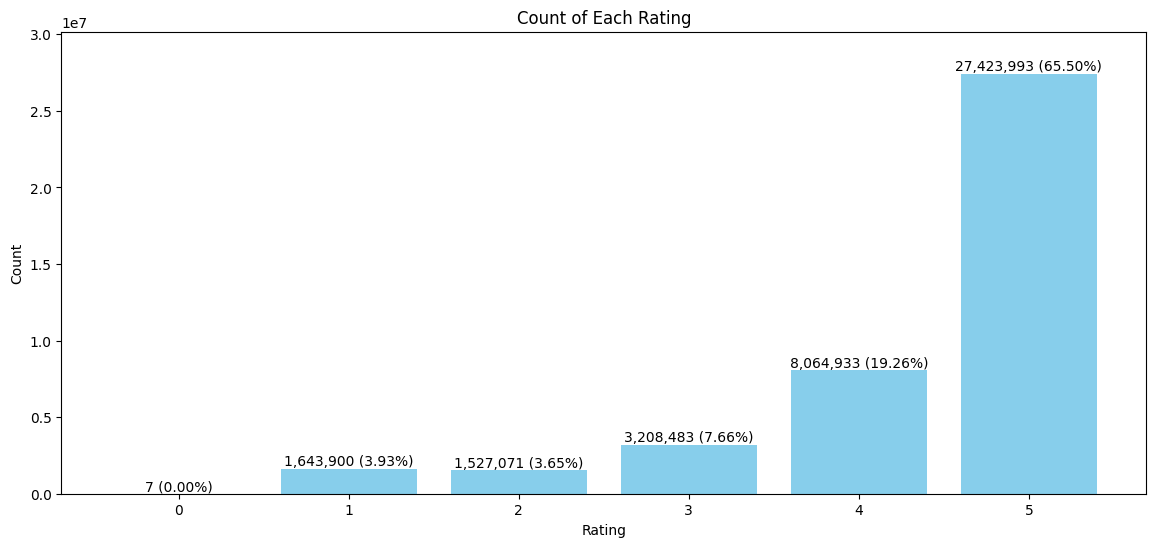

In [ ]:

rating_counts = all_data['overall'].value_counts().sort_index()
total_count = rating_counts.sum()
plt.figure(figsize=(14, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    pct = (yval / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,} ({pct:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rating_counts.index)
plt.ylim(0, rating_counts.max() * 1.1)  # Adding some space on top
plt.show()

The distribution of ratings is highly skewed, as evidenced by the bar chart. It is clear that the ratings are neither normally nor evenly distributed. The vast majority of the ratings are concentrated at 5, with ratings of 4 and 5 together comprising nearly the entire dataset. This pattern suggests that users who have a positive experience with a book are far more likely to leave a review, while those who find a book mediocre or only somewhat satisfying may not feel compelled to provide feedback. Additionally, it appears that very few readers felt strongly enough to rate a book poorly, with ratings of 1 and 2 being extremely rare. This imbalance could reflect a tendency among reviewers to share positive experiences more frequently, or it could indicate that users who dislike a book might simply choose not to rate it at all.

**Checking for Missing Values**

The first critical step is to check for any missing values in our dataset. Since our recommendation system relies heavily on the available reviews, it's essential to ensure that we have sufficient and complete data to work with. Identifying and addressing missing values early on will help us maintain the integrity of our analysis and the effectiveness of the recommendation system.

In [ ]:
df_summary.isna().sum()

summary    11304
dtype: int64

Fortunately, there are only a few missing values in the summaries, which is a positive sign. This indicates that most reviewers took the time to provide a summary, which could be valuable for extracting insights later on. These summaries might offer additional context or highlight key points that can enhance the accuracy and relevance of our recommendation system.

In [ ]:
df_summary['length'] = df_summary['summary'].apply(lambda x: len(x) if x is not None else 0)


Next, we examined the distribution of the lengths of the summaries. Understanding how long or short the summaries typically are can provide insights into the level of detail reviewers tend to include. This information is valuable for determining how summary length might correlate with the usefulness of a review or the effectiveness of the recommendation system.

In [ ]:
df_summary['length'].value_counts().sort_index()

length
0        11304
1        12835
2        55886
3       159269
4       348708
         ...  
1451         1
1527         1
1601         1
1730         1
2482         1
Name: count, Length: 643, dtype: int64

We noticed a significant variation in the length of summaries—while most users provided concise summaries, a few included extremely long ones. To better understand this distribution, we decided to focus on the 90th quantile. This approach helps us identify the threshold where the majority of summaries fall, allowing us to distinguish between typical summary lengths and outliers.

In [ ]:
quantile_90 = df_summary['length'].quantile(0.90)

quantile_90

53.0

To effectively visualize the distribution of summary lengths, we created a histogram. Histograms are particularly useful for this purpose, as they provide a clear and intuitive way to observe how summary lengths are distributed across the dataset, highlighting any patterns or anomalies such as the concentration of shorter summaries and the presence of unusually long ones.

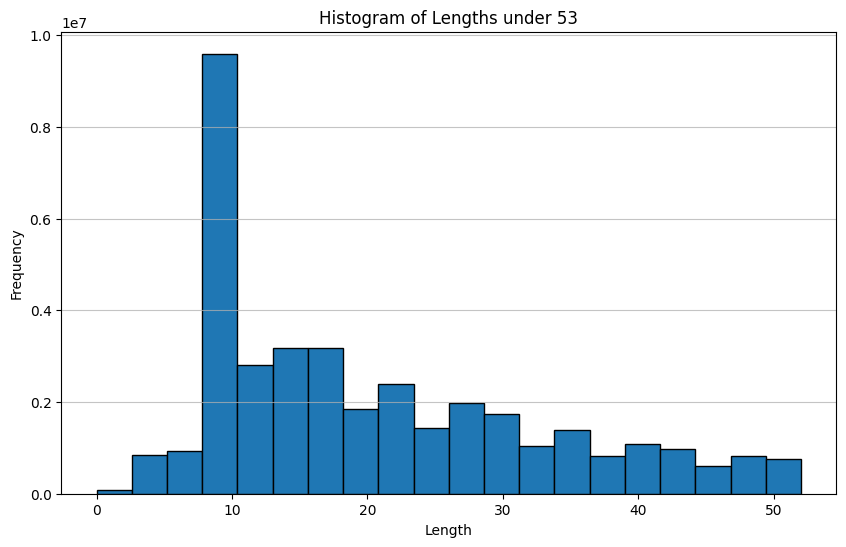

In [ ]:
lengths_under_53 = df_summary[df_summary['length'] < 53]['length']
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_53, bins=20, edgecolor='black')
plt.title('Histogram of Lengths under 53')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram clearly illustrates that the majority of summaries fall within the 1 to 30-word range, with frequency gradually diminishing beyond that point. This distribution suggests that most users tend to write relatively short summaries. This trend is understandable given the diverse audience of book reviewers—ranging from parents buying children's books to enthusiasts of dense historical volumes. The data reflects the broad spectrum of users, each with different preferences and reasons for reviewing, leading to varied summary lengths.

Next, we will conduct a similar analysis for the reviews.

In [ ]:
df_books_review=pd.read_parquet("/content/drive/MyDrive/books_reviewertext_length.parquet")
df_kinlde_review=pd.read_parquet("/content/drive/MyDrive/kindle_reviewertext_length.parquet")

In [ ]:
df_books_review.isna().sum()

reviewerID    0
length        0
dtype: int64

In [ ]:
df_kinlde_review.isna().sum()

reviewerID    0
length        0
dtype: int64

We observed that all samples in both the books and Kindle files contain reviews, which speaks to the quality of the data. As part of our exploratory data analysis (EDA), we'll apply this process to both datasets to gain a deeper understanding of their characteristics.

Next, we proceeded to calculate the lengths of reviews in both the books and Kindle datasets. Afterward, we'll visualize these distributions by creating histograms.

In [ ]:
df_books_review['length'].value_counts().sort_index()

length
0         5695
1         3970
2        31596
3        10865
4        88093
         ...  
34241        1
34254        1
34283        1
34406        1
35094        1
Name: count, Length: 17156, dtype: int64

In [ ]:
df_kinlde_review['length'].value_counts().sort_index()

length
0         4718
1         4276
2        16707
3         6756
4        40894
         ...  
32619        1
32645        1
32768        1
32771        1
33860        1
Name: count, Length: 11274, dtype: int64

Similar to our approach with the summaries, we checked the 90th quantile for review lengths due to the presence of some exceptionally long reviews. This analysis allows us to identify the upper range of typical review lengths, helping us understand where most reviews fall and to distinguish the longer, more detailed reviews from the majority.


In [ ]:
quantile_90 = df_books_review['length'].quantile(0.50)

quantile_90

260.0

In [ ]:
quantile_90 = df_kinlde_review['length'].quantile(0.50)

quantile_90

169.0

An interesting phenomenon emerged during our analysis: both the 90th percentile and the median review lengths are significantly longer in the Kindle dataset compared to the books dataset. This suggests that users writing reviews for Kindle editions tend to provide more detailed and extensive feedback than those reviewing physical books.

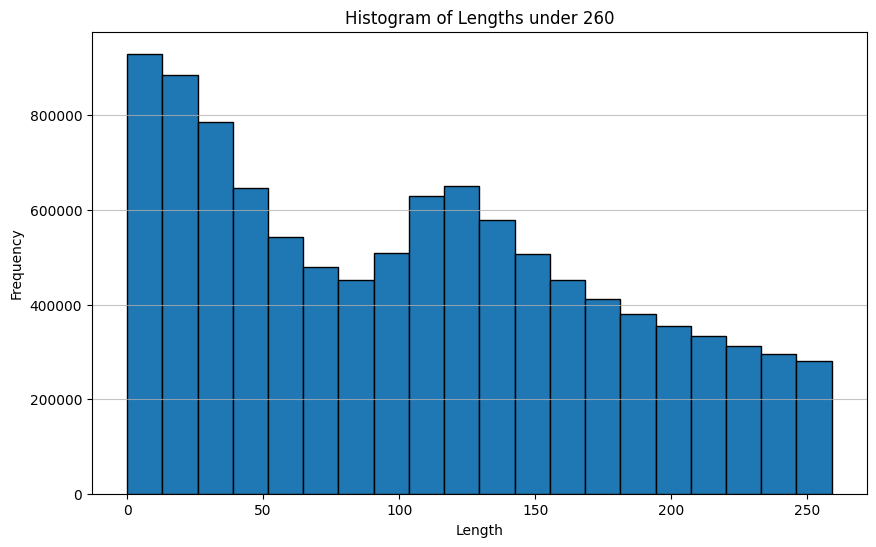

In [ ]:
lengths_under_260 = df_books_review[df_books_review['length'] < 260]['length']
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_260, bins=20, edgecolor='black')
plt.title('Histogram of Lengths under 260')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram presents a broad range of review lengths, from very short to quite lengthy. The distribution shows a noticeable trend where most reviews are under 150 words. This aligns with the expectation that, over time, people are less inclined to write detailed, well-reasoned comments and reviews online. The histogram captures this shift in behavior, highlighting the prevalence of shorter, more concise reviews in the dataset.

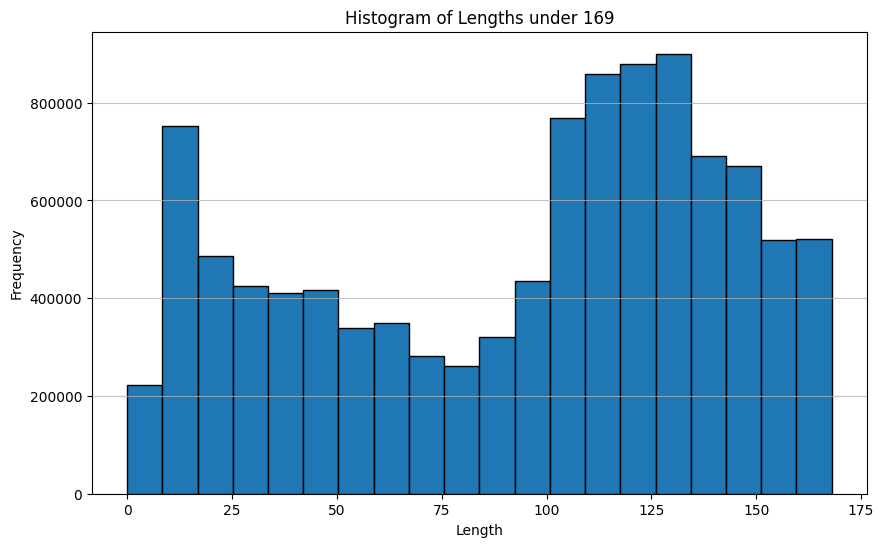

In [ ]:

lengths_under_169 = df_kinlde_review[df_kinlde_review['length'] < 169]['length']
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_169, bins=20, edgecolor='black')
plt.title('Histogram of Lengths under 169')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram reveals a surprising pattern: reviews with over 100 words have a higher frequency than shorter reviews, contrary to what we initially anticipated. This unexpected spike suggests that a significant portion of users still invest time in writing more detailed reviews. However, without additional information about the reviewers, we cannot delve deeper into the reasons behind this trend. Nonetheless, while intriguing, this finding may not be critical to our overall analysis.

**Initial User Activity Analysis: Review Count Threshold**

To gain an initial understanding of user behavior, we checked if users had more than 10 reviews. We established that 10 reviews is the minimum number required per user to effectively train and test our recommendation system. Without reaching this threshold, it becomes difficult to predict users' behavior and build a robust system based on it.

To facilitate this analysis, we created a combined file called "Both" that includes the 'reviewerID' from both the books and Kindle datasets. We then ran queries to determine how many users had more than 10 reviews across both sources. This preliminary step was crucial for getting an initial feel for the data and assessing whether our dataset meets the requirements for further analysis.

In [ ]:
import polars as pl
all_reviewer_ids = pl.DataFrame(schema={'reviewerID': pl.Utf8})  # Use Utf8 for strings
path_to_parquet_files = '/content/drive/MyDrive/books-parquet/'
# Accumulate reviewer IDs
for i in range(1, 1027):
    file_path = path_to_parquet_files + f"output_chunk_{i+1}.parquet"
    df = pl.read_parquet(file_path, columns=["reviewerID"])
    all_reviewer_ids = pl.concat([all_reviewer_ids, df])
reviewer_ids = pd.DataFrame(all_reviewer_ids)
reviewer_ids.columns = ['reviewerID']
reviewer_ids['source']='books'
reviewer_ids.to_csv('books_reviewerID.csv', index=False)

In [ ]:
# Group by reviewerID and count the occurrences
reviewer_id_counts = all_reviewer_ids.value_counts().reset_index()
reviewer_id_counts.columns = ['reviewerID', 'count']
print(reviewer_id_counts.head())

       reviewerID  count
0  A1D2C0WDCSHUWZ    697
1  A2F6N60Z96CAJI    479
2  A1K1JW1C5CUSUZ    353
3  A2OJW07GQRNJUT    278
4  A1X8VZWTOG8IS6    243


The same process was repeated for the Kindle dataset, excluding the grouping and counting step (value_counts()), to ensure we consistently gathered and processed the reviewerIDs from both datasets.

To better understand the distribution of reviewers across both datasets (books and Kindle), we added a source column to each DataFrame. This column allows us to identify the origin of each record—whether it comes from the books dataset or the Kindle dataset.

After combining the datasets, we used plotly.express to visualize the overlap between reviewers who have reviews in both sources. This visualization helps us see how many reviewers are active in both formats and how many are unique to each, providing insights into user behavior and preferences across different reading platforms.

In [ ]:
csv_file_path = '/content/drive/MyDrive/books_reviewerID.parquet'
books_df = pd.read_parquet(csv_file_path)
books_df['source']='books'
parquet_file_path = '/content/drive/MyDrive/kindle_reviewerID.parquet'
kindle_df = pd.read_parquet(parquet_file_path)
kindle_df['source'] = 'kindle'
combined_df = pd.concat([books_df, kindle_df], ignore_index=True)
output_file_path = 'reviewerID_both.csv'
combined_df.to_csv(output_file_path, index=False)
#print(f"Data saved to {output_file_path}")

In [ ]:
# Group by reviewerID and count the occurrences of each source
reviewer_source_counts = combined_df.groupby('reviewerID')['source'].value_counts().unstack(fill_value=0)

reviewer_source_counts.reset_index(inplace=True)

reviewer_source_counts.columns = ['reviewerID', 'count_books', 'count_kindle']

print(reviewer_source_counts.head())

reviewer_source_counts.to_csv('grouped_reviewerID_count.csv', index=False)

In [ ]:
reviewer_source_counts=pd.read_csv('/content/drive/MyDrive/grouped_reviewerID_count.csv')

We then visualize the amount of reviews, only for users with over 10 reviews in both the books and Kindle datasets.

In [ ]:
import plotly.express as px

# Filter the DataFrame to include only rows where both counts are greater than 10
filtered_df = reviewer_source_counts[(reviewer_source_counts['count_books'] > 10) &
                                     (reviewer_source_counts['count_kindle'] > 10)]
# Create  scatter plot
fig = px.scatter(filtered_df, x='count_books', y='count_kindle',
                 title='Comparison of Book and Kindle Reviews per Reviewer (Counts > 10)',
                 labels={'count_books': 'Count of Books Reviews', 'count_kindle': 'Count of Kindle Reviews'})

fig.update_layout(xaxis=dict(scaleanchor='y',scaleratio=1),yaxis=dict(scaleanchor='x',scaleratio=1))
fig.show()


The scatter plot reveals a few key insights about users who have reviewed both physical books and Kindle editions, with more than 10 reviews in each category:

**Overlap in Reviewers:**


There is a significant number of users who have reviewed both books and Kindle editions, indicating a considerable overlap in user engagement across these formats.

**Tendency Toward Book Reviews:**

The plot shows a tendency for reviewers to have slightly more reviews for physical books than for Kindle editions. While some users are active in both categories, many have a stronger focus on reviewing physical books.

**Review Distribution:**

The majority of reviewers fall within the lower range of review counts for both formats. However, there are a few outliers who have reviewed thousands of books, with a lesser but still notable amount of Kindle reviews.

In the next step, we visualized the distribution of reviewers based on their review counts, separately for books and Kindle editions, for users with over 10 reviews.

In [ ]:
review_counts_books = books_df.groupby('reviewerID').size()
reviewers_with_more_than_10_books = review_counts_books[review_counts_books >= 10]
fig = px.histogram(reviewers_with_more_than_10_books, x=reviewers_with_more_than_10_books.values,
                   nbins=int(reviewers_with_more_than_10_books.max() / 25),
                   labels={'x': 'Review Counts', 'y': 'Number of Reviewers'},
                   title='Distribution of Review Counts per Reviewer')
fig.update_layout(bargap=0.2)
fig.show()

As seen from the graph, the majority of reviewers have contributed fewer than 1,000 reviews, with a significant portion contributing fewer than 100 reviews. This suggests that while there are some highly active reviewers, most users tend to write reviews less frequently.
In addition, there is a long tail in the distribution, indicating that only a small number of users have written a very large number of reviews (upwards of several thousand). These prolific reviewers are outliers compared to the broader user base.
The pattern observed aligns with typical user behavior on online platforms, where a small number of users are highly active, but most users contribute only occasionally.

Now, we shift our focus to examining the reviews specifically within the Kindle dataset.

In [ ]:
review_counts_kindle = kindle_df.groupby('reviewerID').size()
reviewers_with_more_than_10_kindle = review_counts_kindle[review_counts_kindle >= 10]
fig = px.histogram(reviewers_with_more_than_10_kindle, x=reviewers_with_more_than_10_kindle.values,
                   nbins=int(reviewers_with_more_than_10_kindle.max() / 25),
                   labels={'x': 'Review Counts', 'y': 'Number of Reviewers'},
                   title='Distribution of Review Counts per Reviewer')
fig.update_layout(bargap=0.2)
fig.show()

As expected, the vast majority of Kindle reviewers have contributed fewer than 1,000 reviews, with a large portion contributing fewer than 100 reviews. This indicates that most users engage in reviewing only occasionally.
To ensure our recommendation system effectively captures user preferences, we plan to focus on reviewers who have provided at least 10 reviews. This threshold will help us gather sufficient data on individual users' tastes, which is crucial for user-based recommendations.
The graph also shows a few reviewers who stand out as outliers, with a significantly higher number of reviews. These highly active users provide a wealth of data that could be particularly valuable for refining our recommendation algorithms.

Next, we wanted to check how many users have more than 10 reviews in one but not the other, again, just to get an idea of the data. The reasoning in the beginning was also to perhaps take users who have more than 10 reviews in both kinds of the scraped files, books and kindle.

In [ ]:
reviewer_source_counts[(reviewer_source_counts['count_books']>10) & (reviewer_source_counts['count_kindle']<10)]

reviewerID  count_books  count_kindle
16        A00037304EKN1SJNQV5A           13             0
17        A000392684P4JNLQRBBW           12             1
73        A0015332H21AK8WZ0ZCS           13             1
216       A0042814FUEOXHEB05SQ           22             3
224       A0044294CPA1QY04FSGM           14             1
...                        ...          ...           ...
15991281         AZZY4W8E5AX2K           26             3
15991322         AZZYKHA63LQ7A           65             2
15991342         AZZYPJRSGXWSK           26             1
15991355         AZZYVTX23JWKM           21             2
15991435         AZZZTAPYKI9RD           11             1

[667392 rows x 3 columns]

In [ ]:
reviewer_source_counts[(reviewer_source_counts['count_books']<10) & (reviewer_source_counts['count_kindle']>10)]

reviewerID  count_books  count_kindle
5040      A10028CM1L3CV8            7            12
5227      A100443KQDL0G9            8            15
6779      A100M0VHTEOWN2            5            11
7139      A100POKZLCEFWI            8            16
8148      A10112P0OZNFRC            9            13
...                  ...          ...           ...
15983430   AZXHRKV6OESUY            9            13
15984443   AZXT63K599YX8            3            12
15987602   AZYSCBAZ940SR            7            26
15988121     AZYYBBC73BQ            3            11
15991074   AZZW5NCOD8IA0            9            19

[4647 rows x 3 columns]

This little analysis provides us with many users who are not dual reviewers, and might behave differently.

### Coherency

To ensure the **coherency** of our data, we next examined the style columns in each of our JSON files. We have already previously seen that this might be an issue.
An extraction process for the style feature already took place.

In [ ]:
df=pq.read_table('/content/drive/MyDrive/books_only_style_column.parquet')
df=df.to_pandas()
filtered_counts =df['style'].value_counts(sort=True)
print(filtered_counts)

style
{'Format:': ' Kindle Edition'}                 17172000
{'Format:': ' Paperback'}                       8129082
{'Format:': ' Hardcover'}                       5152115
{'Format:': ' Mass Market Paperback'}           1023654
{'Format:': ' Board book'}                       206655
                                                 ...   
{'Color:': ' School Pop', 'Format:': None}            1
{'Format:': ' Videotape'}                             1
{'Color:': ' Super Power', 'Format:': None}           1
{'Format:': ' Puzzle'}                                1
{'Format:': ' Unbound', 'Style:': None}               1
Name: count, Length: 292, dtype: int64


Upon examining the style columns, we observed that the dataset includes entries for items such as videotapes and puzzles, which are unrelated to books and Kindle editions. This indicates a lack of coherency in the dataset, as it should be exclusively focused on book-related products.

we visualized the top 10 most common styles:

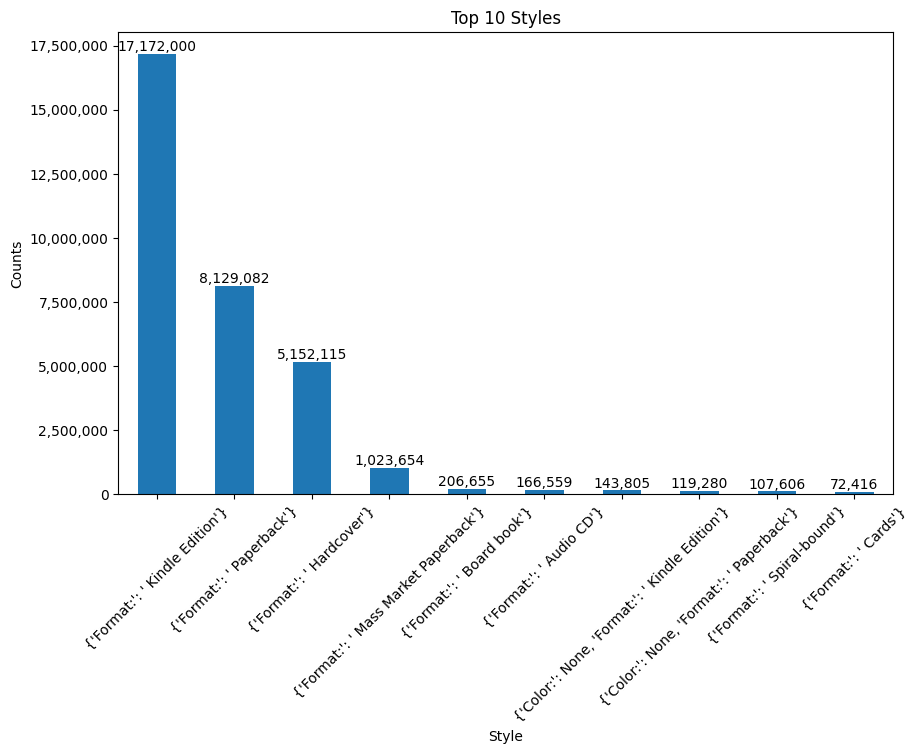

In [ ]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
filtered_counts = df['style'].value_counts(sort=True)
top_10 = filtered_counts.head(10)
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.title('Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Counts')
plt.xticks(rotation=45)
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
for index, value in enumerate(top_10):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
plt.show()

The bar chart clearly shows that the vast majority of reviews are associated with the top 4 styles:

The **Kindle Edition, Paperback, Hardcover,** and **Mass Market Paperback** styles dominate the dataset, accounting for the majority of entries. This confirms that most of the data is indeed book-related, which aligns with our expectations for the dataset.
Notably, Kindle Edition appears in the books dataset, which shouldn't have happened since the books scraping was intended to exclude Kindle formats.

Next, we perform a similar coherency check on the Kindle file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kindle_style_only.csv')
df.columns=[['reviewerID','style']]
filtered_counts =df['style'].value_counts(sort=True)
print(filtered_counts.head())

(style,)                             
{'Format:': ' Kindle Edition'}           5045160
{'Format:': ' Paperback'}                 165154
{'Format:': ' Hardcover'}                  72067
{'Format:': ' Mass Market Paperback'}      10295
{'Format:': ' Audible Audiobook'}           6455
Name: count, dtype: int64


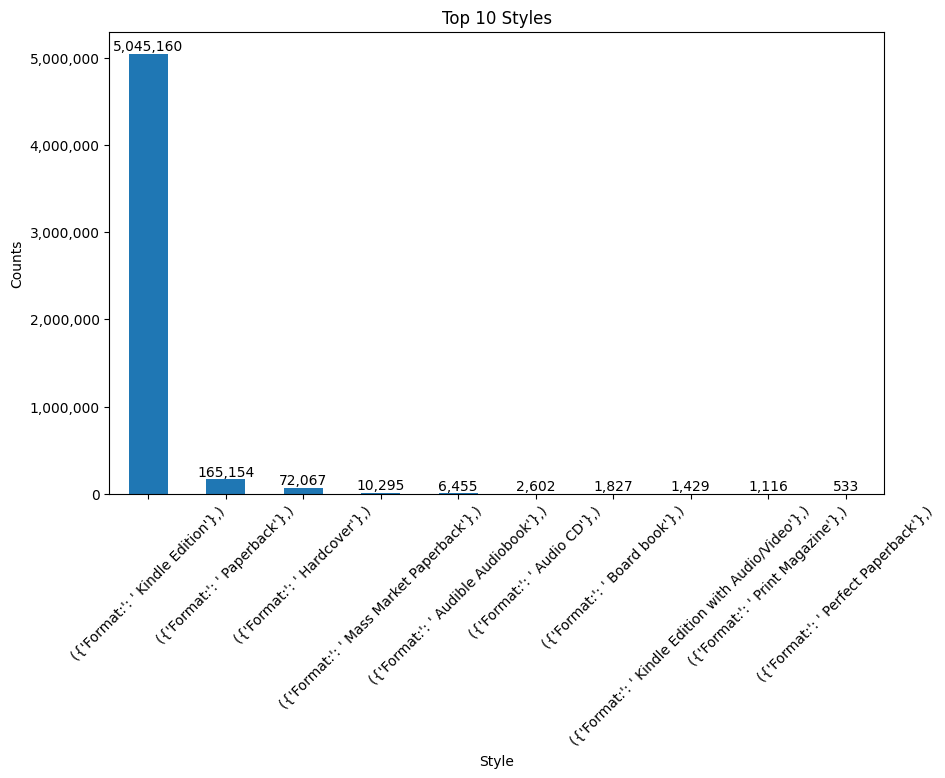

In [ ]:
filtered_counts = df['style'].value_counts(sort=True)
top_10 = filtered_counts.head(10)
# Create a bar graph
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.title('Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Counts')
plt.xticks(rotation=45)
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
for index, value in enumerate(top_10):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
plt.show()

Although most records are relevant to Kindle, some entries are still irrelevant, indicating that the data is dirty. Given the large size of the files and the limitations of working with them in a RAM-constrained environment, we have decided to proceed with only the books.json file.

Despite the presence of Kindle reviews within the books.json file, we now plan to treat this category separately. We will focus exclusively on the first four formats—Kindle Edition, Paperback, Hardcover, and Mass Market Paperback—as these provide sufficient records and are most relevant to our analysis. This approach allows us to maintain data quality while efficiently managing the dataset size.

To prepare the dataset for analysis, we undertook the preprocessing steps of removing irrelevant fields and
dividing the dataset.
We removed unnecessary fields from the dataset, including reviewTime, unixReviewTime, and Image. These fields were not relevant to our analysis and eliminating them helped reduce the dataset's size.
We then divided the dataset into two categories: Kindle and Books, based on the formats.
Each category was saved into 7 separate files to manage the large size of the data more efficiently and ensure smoother processing.

 An example of how we worked with the first file is shown:

In [ ]:
first_book_after_preprocessing=pl.read_parquet("/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_1.parquet")
first_book_after_preprocessing=first_book_after_preprocessing.to_pandas()

the next step was to check for unique values in each of the columns

In [ ]:
column_details = [(column, first_book_after_preprocessing[column].nunique(), first_book_after_preprocessing[column].dtype) for column in first_book_after_preprocessing.columns if column != "style"]
column_summary_df = pd.DataFrame(column_details, columns=['feature name', 'unique', 'type'])
print(column_summary_df)

   feature name   unique    type
0       overall        5   int64
1      verified        2    bool
2    reviewerID  2120679  object
3          asin    70325  object
4  reviewerName  1416147  object
5    reviewText  3485673  object
6       summary  2308730  object
7          vote     1562  object


The analysis of unique values in each column provides encouraging insights:

overall: Contains 5 unique integer values, corresponding to the expected rating scale from 1 to 5.
verified: A boolean column with 2 unique values, indicating whether the review was verified.
reviewerID & reviewerName: With over 2 million unique reviewerIDs and around 1.4 million unique reviewerNames, we can confirm a large and diverse set of reviewers.
asin: Over 70,000 unique ASINs, indicating a wide variety of products reviewed.
reviewText & summary: Both columns have a high number of unique values, with over 3.4 million unique review texts and over 2.3 million unique summaries, suggesting minimal duplication in the data.

**Handling missing values:**


The first step in cleaning the dataset is to address any NA (Not Available) values

In [ ]:
first_book_after_preprocessing.apply(lambda col: col.isin(["nan", "NaN", "None"]).sum())

overall               0
verified              0
reviewerID            0
asin                  0
style                 0
reviewerName        118
reviewText           86
summary              20
vote            2548621
dtype: int64

vote Column:

Out of 3.4 million reviews, the vast majority of vote values are NA. Since this column does not provide consistent or additional useful information, we decided to discard it.

reviewerName Column:

The reviewerName column has 118 NA values. However, since our recommendation system will be based on reviewerID, reviewerName is not essential for our analysis. We have therefore decided to remove this column as well.

In [ ]:
first_book_after_preprocessing.drop(columns=["vote", "reviewerName"], inplace=True)
# Convert "nan", "NaN", "None", and empty strings to np.nan in the new DataFrame
first_book_after_preprocessing.replace(["nan", "NaN", "None", ""], np.nan, inplace=True)
first_book_after_preprocessing.dropna(inplace=True)

Due to different variable type, in order to prevent potential issues related to variable types, we standardized the style column by converting it to a string format


In [ ]:
first_book_after_preprocessing["style"] = first_book_after_preprocessing["style"].astype(str)

In [ ]:
print(first_book_after_preprocessing.duplicated().sum())


3356


Upon checking for duplicates in the preprocessed dataset, we found 3,356 duplicate entries out of the entire first file. While this number is relatively small compared to the overall dataset, it's still important to address these duplicates to ensure the quality and integrity of our data.

In [ ]:
duplicates = first_book_after_preprocessing.duplicated(keep=False)
duplicate_rows = first_book_after_preprocessing[duplicates]
duplicate_rows.head()

overall  verified      reviewerID        asin  \
1007        5     False   AN4RKQM9AYVAD  0001384198   
1008        5     False   AN4RKQM9AYVAD  0001384198   
1170        5      True  A3IVT3UA3ZERWQ  0001381733   
1171        5      True  A3IVT3UA3ZERWQ  0001381733   
1195        5      True  A3PYRSATCV6329  0001381733   

                          style  \
1007  {'Format:': ' Hardcover'}   
1008  {'Format:': ' Hardcover'}   
1170  {'Format:': ' Hardcover'}   
1171  {'Format:': ' Hardcover'}   
1195  {'Format:': ' Hardcover'}   

                                             reviewText  \
1007  I liked this book because it motivated me to d...   
1008  I liked this book because it motivated me to d...   
1170                                        Excellent!!   
1171                                        Excellent!!   
1195                                             A gift   

                                          summary  
1007  This book is good for anyone who have kids.  
1008  This book is good for anyone who have kids.  
1170                                  Excellent!!  
1171                                  Excellent!!  
1195                                   Five Stars

Given that the duplicates appear to be valid reviews but constitute an insignificant portion of the overall dataset, the safest and most efficient approach is to remove them. This ensures that our analysis is based on unique entries, which reduces redundancy and potential bias in our model.

In [ ]:
first_book_after_preprocessing.drop_duplicates(keep=False, inplace=True)

To ensure data integrity, we need to check whether any users have reviewed the same book more than once. This scenario is generally uncommon and could indicate duplicate or erroneous entries that should be addressed

In [ ]:
reviews_count = first_book_after_preprocessing.groupby(['reviewerID', 'asin']).size().reset_index(name='number_of_reviews').sort_values(by='number_of_reviews', ascending=False)
reviews_count.head()

reviewerID        asin  number_of_reviews
1797847  A2TXR85WQLE32N  0140324623                 57
352583   A1D2C0WDCSHUWZ  000711835X                 35
352629   A1D2C0WDCSHUWZ  0007350783                 20
352554   A1D2C0WDCSHUWZ  0001844423                 17
640152   A1NF9WS7RR82MX  0142800376                 16

In [ ]:
(reviews_count[reviews_count["number_of_reviews"] > 1])["number_of_reviews"].sum()

43520

The initial analysis revealed that certain users, such as **A1D2C0WDCSHUWZ**, have reviewed the same book multiple times—some with a surprisingly high number of reviews (e.g., 57 reviews for the same book). This is unexpected and suggests that there might be underlying issues in the data that need further investigation. Given that the reviewerID **A1D2C0WDCSHUWZ** appears multiple times with a high number of reviews for different ASINs, we decided to start by closely examining this user’s reviews.

In [ ]:
filtered_df = first_book_after_preprocessing[(first_book_after_preprocessing['reviewerID'] == 'A1D2C0WDCSHUWZ') & (first_book_after_preprocessing['asin'] == '0007350783')]
filtered_df.head(20)

overall  verified      reviewerID        asin  \
194890        4     False  A1D2C0WDCSHUWZ  0007350783   
195068        4     False  A1D2C0WDCSHUWZ  0007350783   
196692        5     False  A1D2C0WDCSHUWZ  0007350783   
196718        5     False  A1D2C0WDCSHUWZ  0007350783   
196939        5     False  A1D2C0WDCSHUWZ  0007350783   
196940        5     False  A1D2C0WDCSHUWZ  0007350783   
199395        4     False  A1D2C0WDCSHUWZ  0007350783   
199837        5     False  A1D2C0WDCSHUWZ  0007350783   
200148        4     False  A1D2C0WDCSHUWZ  0007350783   
200182        5     False  A1D2C0WDCSHUWZ  0007350783   
200266        5     False  A1D2C0WDCSHUWZ  0007350783   
200283        4     False  A1D2C0WDCSHUWZ  0007350783   
200286        5     False  A1D2C0WDCSHUWZ  0007350783   
200303        5     False  A1D2C0WDCSHUWZ  0007350783   
200326        5     False  A1D2C0WDCSHUWZ  0007350783   
200379        5     False  A1D2C0WDCSHUWZ  0007350783   
200399        5     False  A1D2C0WDCSHUWZ  0007350783   
200415        5     False  A1D2C0WDCSHUWZ  0007350783   
200417        4     False  A1D2C0WDCSHUWZ  0007350783   
200425        5     False  A1D2C0WDCSHUWZ  0007350783   

                                        style  \
194890              {'Format:': ' Hardcover'}   
195068              {'Format:': ' Paperback'}   
196692              {'Format:': ' Paperback'}   
196718              {'Format:': ' Paperback'}   
196939              {'Format:': ' Hardcover'}   
196940              {'Format:': ' Paperback'}   
199395              {'Format:': ' Paperback'}   
199837              {'Format:': ' Paperback'}   
200148              {'Format:': ' Hardcover'}   
200182  {'Format:': ' Mass Market Paperback'}   
200266              {'Format:': ' Paperback'}   
200283              {'Format:': ' Paperback'}   
200286  {'Format:': ' Mass Market Paperback'}   
200303  {'Format:': ' Mass Market Paperback'}   
200326              {'Format:': ' Hardcover'}   
200379              {'Format:': ' Paperback'}   
200399              {'Format:': ' Hardcover'}   
200415              {'Format:': ' Paperback'}   
200417  {'Format:': ' Mass Market Paperback'}   
200425              {'Format:': ' Hardcover'}   

                                               reviewText  \
194890  "Emma Woodhouse, handsome, clever, and rich, w...   
195068  "Emma Woodhouse, handsome, clever, and rich, w...   
196692  Gothic romances were all the rage in the late ...   
196718  In Jane Austen's time, young women were taught...   
196939  Gothic romances were all the rage in the late ...   
196940  One of the Dashwood daughters is smart, down-t...   
199395  "Emma Woodhouse, handsome, clever, and rich, w...   
199837  "Emma Woodhouse, handsome, clever, and rich, w...   
200148  Even the best authors in the world sometimes p...   
200182  "Emma Woodhouse, handsome, clever, and rich, w...   
200266  Jane Austen. Her name is practically synonymou...   
200283  Even the best authors in the world sometimes p...   
200286  In Jane Austen's time, young women were taught...   
200303  "Emma Woodhouse, handsome, clever, and rich, w...   
200326  In Jane Austen's time, young women were taught...   
200379  Jane Austen. Her name is practically synonymou...   
200399  Jane Austen. Her name is practically synonymou...   
200415  Jane Austen. Her name is practically synonymou...   
200417  Gothic romances were all the rage in the late ...   
200425  One of the Dashwood daughters is smart, down-t...   

                                                  summary  
194890  It's such a happiness when good people get tog...  
195068  It's such a happiness when good people get tog...  
196692               When a young lady is to be a heroine  
196718                                           A second  
196939               When a young lady is to be a heroine  
196940                     The sensitive and the sensible  
199395                              It's such a happiness  
199837            

We receievd a strange result, many critics for same books, in different styles. We went back to search for the reviewerName, which is E.A. Solinas.

Upon further investigation, it turns out that the multiple reviews we observed from the user E.A. Solinas were indeed valid. These reviews were not duplicates in the traditional sense but rather reviews of the same book Emma by Jane Austen, listed under different editions and formats on Amazon:
https://www.amazon.com/Emma-Be-Classics-Jane-Austen/dp/0142419680

https://www.amazon.com/Emma-Knickerbocker-Classics-Jane-Austen/dp/1631060708 https://www.amazon.ca/product-reviews/B0C1KX3MQQ/ref=zg_bsnr_1051378_cr_sccl_1/000-0000000-0000000

 Additionally, the user reviewed other works by the same author, https://www.amazon.com.au/Northanger-Abbey-Jane-Austen-ebook/dp/B07XXWBYX6


We see that for the same reviewerID, and same asin there are different reviews, which while searching the web shows us different books. The question is whether we can tell which book is really the one that the reviewer had reviewed using the metadata file and perhaps save this data.

**Transition to Metadata Files**

In [ ]:
base_file_name = 'meta-books-csv-chunk_{}.parquet'
file_location = '/content/drive/MyDrive/meta-books-parquet/'
start_file_number = 1
meta_books_df = pd.DataFrame()
for file_number in range(start_file_number, end_file_number + 1):
    file_path = file_location + base_file_name.format(file_number)
    df = pd.read_parquet(file_path)
    meta_books_df = pd.concat([meta_books_df, df], ignore_index=True)


In [ ]:
meta_books_df[meta_books_df['asin'] == '0007350783']

category tech1  \
5617  ['Books', 'Literature & Fiction', 'Classics']   NaN   

                                            description  fit  \
5617  ['', 'Jane Austen (17751817) was an English no...  NaN   

                        title  \
5617  Emma (Collins Classics)   

                                               also_buy  tech2  \
5617  ['0141439688', '0141439661', '0141439807', '01...    NaN   

                                brand feature                rank  \
5617  Visit Amazon's Jane Austen Page      []  625,123 in Books (   

                                              also_view main_cat similar_item  \
5617  ['0141439513', '0141439661', '1514696886', '01...    Books          NaN   

     date  price        asin imageURL imageURLHighRes details  
5617  NaN  $3.99  0007350783       []              []     NaN

 Now we would count how many books with the word "Emma" in the title exist in the metadata file

In [ ]:
meta_books_df[meta_books_df['title'].str.contains("Emma", case=False, na=False)]

category tech1  \
2846                    ['Books', 'Biographies & Memoirs']   NaN   
4759     ['Books', 'Arts & Photography', 'Performing Ar...   NaN   
5617         ['Books', 'Literature & Fiction', 'Classics']   NaN   
7438                                                    []   NaN   
7858     ['Books', 'Literature &amp; Fiction', 'Contemp...   NaN   
...                                                    ...   ...   
2921003  ['Books', 'Medical Books', 'Medicine', '</span>']  None   
2923241                                                 []  None   
2929244                                                 []  None   
2931466  ['Books', 'Literature & Fiction', 'Genre Ficti...  None   
2933574                                                 []  None   

                                               description  fit  \
2846     ['`One of the best (books) I have ever read on...  NaN   
4759                                                    []  NaN   
5617     ['', 'Jane Austen (17751817) was an English no...  NaN   
7438                                              ['', '']  NaN   
7858     ['Artie Hobson here describes the slow decline...  NaN   
...                                                    ...  ...   
2921003                                                 []  NaN   
2923241                                                 []  NaN   
2929244                                                 []  NaN   
2931466                                                 []  NaN   
2933574  ['By Polacco, Patricia ( Author ) [ { Emma Kat...  NaN   

                                                     title  \
2846     Emma's War: Love, Betrayal and Death in the Sudan   
4759                       Undressing Emmanuelle: A Memoir   
5617                               Emma (Collins Classics)   
7438                            EDITING EMMA- NOT-US CA PB   
7858                  Prisoner's Dilemma (Collier Fiction)   
...                                                    ...   
2921003   Clinical Dilemmas in Non-Alcoholic Fatty Live...   
2923241  Life and Work in Middlebury, Vermont, of Emma ...   
2929244  His Five Night Stand: A Bedroom Secrets Romanc...   
2931466  Political Murder: An Elizabeth Thatcher Myster...   
2933574  By Polacco, Patricia ( Author ) [ { Emma Kate[...   

                                                  also_buy  tech2  \
2846     ['0307385906', '0812968859', '178453644X', '15...    NaN   
4759                                        ['B000TXPXAU']    NaN   
5617     ['0141439688', '0141439661', '0141439807', '01...    NaN   
7438                                                    []    NaN   
7858     ['0060975008', '0060975091', '0312423136', '03...    NaN   
...                                                    ...    ...   
2921003                                                 []    NaN   
2923241                                                 []    NaN   
2929244                                                 []    NaN   
2931466  ['B01HYBVT8Y', 'B075FJJ545', 'B075PZFJFQ', 'B0...    NaN   
2933574                                                 []    NaN   

                                         brand feature  \
2846     Visit Amazon's Deborah Scroggins Page      []   
4759        Visit Amazon's Sylvia Kristel Page      []   
5617           Visit Amazon's Jane Austen Page      []   
7438                              CHLOE SEAGER      []   
7858        Visit Amazon's Richard Powers Page      []   
...                                        ...     ...   
2921003                         Roger Williams      []   
2923241                          Ezra Brainerd      []   
2929244                                   None      []   
2931466                            Emma Lathen      []   
2933574                       Patricia Polacco      []   

                                     rank  \
2846                12,801,197 in Books (   
4759                 1,914,793 in Books (   
5617                  

The search has yielded quite a lot of books with the word Emma in their title. The next step is to count how many such books exist with the author Jane Austen in their brand or description feature.

In [ ]:
meta_books_df[ meta_books_df['brand'].str.contains("Jane Austen", case=False, na=False) & meta_books_df['title'].str.contains("Emma", case=False, na=False) ]

category tech1  \
5617         ['Books', 'Literature & Fiction', 'Classics']   NaN   
104629         ['Books', 'Humor & Entertainment', 'Humor']   NaN   
181514   ['Books', 'Literature &amp; Fiction', 'History...   NaN   
297270   ['Books', 'Literature &amp; Fiction', 'History...   NaN   
297590   ['Books', 'Literature &amp; Fiction', 'Classics']   NaN   
394033   ['Books', 'Teen &amp; Young Adult', 'Literatur...   NaN   
447108   ['Books', 'Literature &amp; Fiction', 'Dramas ...  None   
545313       ['Books', 'Literature & Fiction', 'Classics']   NaN   
684514   ['Books', 'Literature &amp; Fiction', 'Classics']  None   
935809       ['Books', 'Literature & Fiction', 'Classics']   NaN   
1086800  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1354455  ['Books', 'New, Used & Rental Textbooks', 'Hum...   NaN   
1393977  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1402407  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1527061                                                 []  None   
1696673  ['Books', 'Literature &amp; Fiction', 'Classics']   NaN   
1937760  ['Books', 'Literature &amp; Fiction', 'History...  None   
2086980                                                 []  None   
2087255  ['Books', 'New, Used &amp; Rental Textbooks', ...  None   
2091761  ['Books', 'New, Used & Rental Textbooks', 'Hum...  None   
2113261  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
2156581  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
2262321      ['Books', 'Literature & Fiction', 'Classics']  None   
2355466  ['Books', 'Literature &amp; Fiction', 'Genre F...   NaN   
2357556  ['Books', 'Teen & Young Adult', 'Literature & ...   NaN   
2457160  ['Books', 'Christian Books & Bibles', 'Literat...   NaN   
2580496                                                 []  None   
2652213  ['Books', 'Literature &amp; Fiction', 'British...  None   
2689836                  ['Books', 'Literature & Fiction']  None   
2721796      ['Books', 'Literature & Fiction', 'Classics']  None   
2775585      ['Books', 'Literature & Fiction', 'Classics']  None   
2779014  ['Books', 'Literature & Fiction', 'History & C...  None   
2808207      ['Books', 'Literature & Fiction', 'Classics']  None   
2877703  ['Books', 'Literature & Fiction', 'World Liter...  None   

                                               description   fit  \
5617     ['', 'Jane Austen (17751817) was an English no...   NaN   
104629   ['&quot;Jane Austen is my favorite author! ......   NaN   
181514   ['', '<b>Jane Austen</b> (17751817) was born i...   NaN   
297270   ['', '<strong>Jane Austen</strong> (17751817) ...   NaN   
297590   ["Emma (1816) is Jane Austen's most characteri...   NaN   
394033                                            ['', '']   NaN   
447108   ['"Jane Austen is my favorite author! ... Shut...   NaN   
545313   ['"How Jane Austen can write!...She is a minia...   NaN   
684514   ['In a publishing career that spanned less tha...   NaN   
935809                            ['Book by Austen, Jane']   NaN   
1086800  ['Hello, Amazon shoppers!', '<b>You can choose...   NaN   
1354455  ['Paperback. Pub Date :2008-11-02 Pages: 80 La...   NaN   
1393977                                           ['', '']   NaN   
1402407  ['Jane Austens (1775-1817) works have enjoyed ...   NaN   
1527061                                                 []   NaN   
1696673  ['"Young readers should relate to an odyssey c...   NaN   
1937760  ['"For classic literature, check out the new "...   NaN   
2086980                                                 []   NaN   
2087255                                           ['', '']   NaN   
2091761  ["Having chosen to publish anonymously during ...   NaN   
2113261  ['', '', 'English novelist Jane Austen came fr...   NaN   
2156581  ["Born December 16, 1775, <b>Jane Austen</b> i...   NaN   
2262321  ["'Jane Austen is my favorite author!... Shut ...   NaN   
2355466                              

In [ ]:
len(reviews_count[reviews_count['number_of_reviews']>1])

51779

After a thorough investigation, it became clear that we cannot definitively determine which book a review corresponds to when the same asin is associated with multiple books. Additionally, the reviews_count analysis showed that there are 51,779 cases where a reviewer has more than one review for the same asin, but with different books potentially linked to it. Therefore, after we saw that there are only 51779 reviews that has more than one review for the same book, we decided to drop them.

In [ ]:
review_counts = first_book_after_preprocessing.groupby(['reviewerID', 'asin']).transform('count')
single_reviews = review_counts.max(axis=1) == 1
first_book_single_reviews = first_book_after_preprocessing[single_reviews]

In [ ]:
first_book_single_reviews.shape

(20685219, 9)

The next step was drilling down further into finding out how come there are users who reviewed so many books.
Even under the assusmption of reading a book once per week, 52 books per year, then for 15 years of using Amazon, one reaches to 780 books and this is extreme outlier.

In [ ]:
review_counts_per_reviewer = first_book_single_reviews["reviewerID"].value_counts()
review_counts_per_reviewer.head()

reviewerID
A2F6N60Z96CAJI    3090
AHUT55E980RDR     1285
A1K1JW1C5CUSUZ     997
AKPKPMWM6IIU5      849
AC1K4OQOZ90RS      772
Name: count, dtype: int64

Given the exceptionally high number of reviews by certain users—ranging from 772 to 3,090 reviews—it's important to characterize their behavior to understand the nature of their activity.



In [ ]:
first_book_single_reviews["style"] = first_book_single_reviews["style"].astype(str)
first_book_single_reviews[(first_book_single_reviews['reviewerID'] == 'A2F6N60Z96CAJI') ].nunique().reset_index(name='unique_name_count')


<ipython-input-7-e444e4b22369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_book_single_reviews["style"] = first_book_single_reviews["style"].astype(str)


index  unique_name_count
0       overall                  5
1      verified                  1
2    reviewerID                  1
3          asin               3090
4         style                  3
5  reviewerName                  1
6    reviewText               3089
7       summary               3085
8          vote                128

 The user has reviewed 3,090 different books (asins), which is extremely high. This seems very extra-ordinary and making us think it is not a regular user, making him outlier. For now we have decided to keep those users, because the later stages of creating a recommendation system will limit the reviews per user.

To ensure the integrity of the dataset, another important validation step is to check whether the same book is listed under multiple ASINs numbers.

In [ ]:
base_file_name = 'meta-books-csv-chunk_{}.parquet'
file_location = '/content/drive/MyDrive/meta-books-parquet/'
start_file_number = 1
end_file_number = 147
meta_books_df = pd.DataFrame()
for file_number in range(start_file_number, end_file_number + 1):
    file_path = file_location + base_file_name.format(file_number)
    df = pd.read_parquet(file_path)
    meta_books_df = pd.concat([meta_books_df, df], ignore_index=True)

In [ ]:
multiple_asins = meta_books_df.groupby('asin')['title'].agg(nunique='nunique', names='unique')
multiple_asins = multiple_asins[multiple_asins['nunique'] > 1]

In [ ]:
multiple_asins

Empty DataFrame
Columns: [nunique, names]
Index: []

This result is promising, as we found no instances of different titles associated with the same ASIN. The next step is to determine if the same book, possibly in different editions or formats, is listed under multiple ASINs. After browsing the Amazon bookstore and observing that many popular books are available in various editions and formats, we decided to analyze this in our meta_books dataset. To do this accurately, we ignored content within parentheses in the titles, as this usually indicates different editions. Additionally, we noticed that the brand feature sometimes includes the author's name directly, while other times it is wrapped in text like "Visit Amazon's {author name} Page." We will correct these inconsistencies in the data before proceeding.

In [ ]:
import re
meta_books_df['title'] = meta_books_df['title'].str.replace(r'\s*\([^)]*\)', '', regex=True)
def extract_author(brand):
    if isinstance(brand, str):
        match = re.search(r"Visit Amazon's (.+?) Page", brand)
        return match.group(1) if match else brand

meta_books_df['brand'] = meta_books_df['brand'].apply(extract_author)

In [ ]:
#Group by 'reviewerID', aggregate to get the count of unique names and the names themselves
same_books = meta_books_df.groupby(['brand', 'title']).size()
same_books = same_books.reset_index()
same_books.columns = ['brand', 'title', 'count']
same_books = same_books[same_books['count'] > 1]
same_books.sort_values(by="count", ascending=False).head()

brand                    title  count
2618416       Tom Taylor                Injustice     39
1731079       Mark Jones           Top Ten Sights     34
1287000    Johanna Spyri                    Heidi     32
280994       Bram Stoker                  Dracula     29
1482589  Kenneth Grahame  The Wind in the Willows     26

We see that some books appear in many versions.

In [ ]:
same_books["count"].sum(), len(meta_books_df)

(68913, 2934949)

The analysis revealed that only 2.3% of the metadata consists of the same books listed under different ASINs, with examples like "Injustice" by Tom Taylor (39 ASINs) and "Dracula" by Bram Stoker (29 ASINs). Given this small percentage, it is reasonable to retain these duplicates in the dataset. This decision allows us to capture the diversity of editions and formats, which can be valuable for users with specific preferences. Additionally, retaining these variations supports a more nuanced recommendation system that can cater to different user needs based on format or edition.

# Extracting features from the reviews

The next steps in this EDA will involve extracting features

## Extracting category

We want to use as much data as we can and compare the relevant models we can create based on our data. One such idea is to use the 'category' value, that can be taken form the "metadata" database, that maps every asin to its category.

In [ ]:
file_path=f"/content/drive/MyDrive/meta-books-parquet/meta_books_chunk_1.parquet"

In [ ]:
df_meta = pl.read_parquet(file_path)
df_meta_pandas = df_meta.to_pandas()

In [ ]:
dataframes = []

for i in range(1, 148):

    file_path = f"/content/drive/MyDrive/meta-books-parquet/meta-books-csv-chunk_{i}.parquet"

    df_meta = pl.read_parquet(file_path)

    df_meta_pandas = df_meta.to_pandas()

    dataframes.append(df_meta_pandas)

combined_df = pd.concat(dataframes, ignore_index=True)

In [ ]:

combined_df['category'] = combined_df['category'].astype(str)

In [ ]:
counting_genres=combined_df['category'].value_counts()

In [ ]:
counting_genres.to_csv("counting_genres.csv")

In [ ]:
counting_genres

category
[]                                                                               389429
['Books', 'Literature &amp; Fiction', 'Genre Fiction']                            70204
['Books', 'History', 'Americas']                                                  68370
['Books', 'New, Used &amp; Rental Textbooks', 'Humanities']                       43530
['Books', 'Literature & Fiction', 'Genre Fiction']                                42191
                                                                                  ...  
['Books', 'History', 'Asia', 'India']                                                 1
['Books', 'Travel', 'Europe', 'Norway', 'General']                                    1
['Books', 'Arts &amp; Photography', 'History &amp; Criticism', 'History']             1
['Books', 'Arts & Photography', 'Individual Artists', "Artists' Books"]               1
['Books', 'Business & Money', 'Marketing & Sales', 'Marketing', 'Multilevel']         1
Name: count, Length: 19

This result shows that some of the genres are very common, and some are quite rare, and the biggest ones are products without genres.

In [ ]:
import ast
def string_to_list(category_string):
    return ast.literal_eval(category_string)

We created a function to extract categories. Many products had '[]' as category which is unknown. Some of them had problems with the & sign and we needed to fix it. In some we removed the end of the category in order to combine it to one.

In [ ]:
import re
# Function to extract the desired category based on the input in the metadat file
def extract_category(categories):
    if not categories:
        return "unknown"  # we have edge case of "[]" in the categories, as you can see above
    if len(categories) == 1:
        return categories[0]
    else:
      second_item = categories[1]
      third_item = categories[2] if len(categories) > 2 else None

    # Check for specific categories
    # if the second category is "New, Used & Rental Textbooks" we move to the third item
    if re.match(r'New, Used (&amp;|&) Rental Textbooks', second_item):
        if third_item:
            return third_item
        # this case is when there are only two categories (['Books', 'New, Used &amp; Rental Textbooks'] or ['Books', 'New, Used & Rental Textbooks'])
        return "unknown"
    else:
        # Return the second category, with "&amp" replaced to "&"
        return re.sub(r'&amp;', '&', second_item)
df['category_list'] = df['category'].apply(string_to_list)
df['extracted_category'] = df['category_list'].apply(extract_category)
print(df[['extracted_category']])

        extracted_category
0                  unknown
1     Literature & Fiction
2                  History
3               Humanities
4     Literature & Fiction
...                    ...
1957               History
1958                Travel
1959    Arts & Photography
1960    Arts & Photography
1961      Business & Money

[1962 rows x 1 columns]


We took the different 1962 categories and managed to group them into only a few.

In [ ]:
df['extracted_category'] = df['extracted_category'].astype(str)
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()

In [ ]:
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                           Business & Finance    1119
3                             Business & Money   88142
4                       Business &amp; Finance    3814
5                                    Calendars   11047
6                             Children's Books  241105
7                     Christian Books & Bibles  150126
8                      Comics & Graphic Novels   41571
9                   Communication & Journalism      14
10              Communication &amp; Journalism      83
11                            Computer Science     668
12                      Computers & Technology   51133
13                      Cookbooks, Food & Wine   52505
14                      Crafts, Hobbies & Home  100310
15                                   Education    3996
16                        Education & Teaching   43512
17        

We received different 46 categories of which we will work next, even after some more cleaning of them.

Now we combine categories based on common knowledge, and what we think that should be the same category

In [ ]:
replacement_dict = {
    'Business & Finance': 'Business & Money',
    'Business &amp; Finance': 'Business & Money',
    'Communication &amp; Journalism': 'Communication & Journalism',
    'Computers & Technology': 'Computer Science',
    'Education': 'Education & Teaching',
    'Medicine & Health Sciences': 'Medical Books',
    'Medicine &amp; Health Sciences': 'Medical Books',
    'Science & Mathematics': 'Science & Math',
    'Science &amp; Mathematics': 'Science & Math',
    'Social Sciences': 'Politics & Social Sciences',
    'Test Prep & Study Guides': 'Test Preparation',
    'Test Prep &amp; Study Guides': 'Test Preparation'
}


df['extracted_category'] = df['extracted_category'].replace(replacement_dict)

In [ ]:
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                             Business & Money   93075
3                                    Calendars   11047
4                             Children's Books  241105
5                     Christian Books & Bibles  150126
6                      Comics & Graphic Novels   41571
7                   Communication & Journalism      97
8                             Computer Science   51801
9                       Cookbooks, Food & Wine   52505
10                      Crafts, Hobbies & Home  100310
11                        Education & Teaching   47508
12                Engineering & Transportation   51961
13                   Health, Fitness & Dieting   51567
14                                     History  138229
15                                  Humanities   58410
16                       Humor & Entertainment   49991
17        

The final amount of categories we reached is 34 categories including an unknown category.

 Merging the extracted categories (df) after all preprocessing, with the relevant asins from the combnined_df that contains all the metadata categories

In [ ]:
combined_df = combined_df[["category", "asin"]]

In [ ]:
combined_df.head()

category        asin
0                                                 []  0000092878
1  ['Books', 'New, Used & Rental Textbooks', 'Med...  000047715X
2           ['Books', 'Arts & Photography', 'Music']  0000004545
3           ['Books', 'Arts & Photography', 'Music']  0000013765
4                                                 []  0000000116

In [ ]:
result_df = combined_df.merge(df, on='category', how='left')


In [ ]:
result_df= result_df[["asin", "extracted_category"]]

In [ ]:
result_df.to_parquet("asin_to_category.parquet")

Now we combine the first file  we have now in the memory with the asin_to_category, to get the reviews, with their categories and save it for later use.

In [ ]:
asin_file=f"/content/drive/MyDrive/asin_to_category.parquet"

## Extracting BOW ,TF-IDF, Embeddings.

In this sub section we will use different models such as TF-IDF, BOW and etc. in order to find new features for our recommendation system later on. As the amount of data is overwhelming, making each part run for ever, we have decided to extract only those users with 50 to 100 reviews in only 2 files, the first one of the books we created and the one of kindle. This guarantees a randomalization, while still include many users with many reviews. Later we will also use them for the recommendation systems.

In [ ]:
file_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/1_book_after_preprocessing.parquet"
df = pl.read_parquet(file_path)
df_pandas_books = df.to_pandas()

In [ ]:
file_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/kindle/1_kindle_after_preprocessing.parquet"
df = pl.read_parquet(file_path)
df_pandas_kindle = df.to_pandas()

Combining the datasets, as in the end the format (Kindle vs Others) does not add much information for the recommendations

In [ ]:
df_for_recommendation_systems = pd.concat([df_pandas_books, df_pandas_kindle], ignore_index=True)

The reasoning for selecting users with 50 to 100 reviews is as follows: on one hand, we do not want users that reviewed 3000 books, with the same review, because they are not common or legitimate users. On the other hand, we understand that the way recommendation system works is based on data that the user voted, and this is the minimun to make the recommendation system work. Also, some models collapsed while we had other filters such as 10 to 100, and this is just the first file so we had to make a compromise in the end about what is a normal number of reviews and what data we can work with.

In [ ]:
user_counts = df_for_recommendation_systems['reviewerID'].value_counts()
users_with_50_100_reviews = user_counts[(user_counts >= 50) & (user_counts <= 100)]
num_users_50_100_reviews = len(users_with_50_100_reviews)
print(f"Number of users with 50 -100 records: {num_users_50_100_reviews}")


Number of users with 50 -100 records: 2593


In [ ]:
filtered_users = users_with_50_100_reviews.index.tolist()
df_filtered = df_for_recommendation_systems[df_for_recommendation_systems['reviewerID'].isin(filtered_users)]
print("Filtered DataFrame:")
df_filtered

Filtered DataFrame:


overall  verified      reviewerID        asin  \
15             5     False  A3H9YD6K9TVKDP  0001713353   
47             5     False  A3QYDL5CDNYN66  0001061240   
72             5     False  A1BNWEJ7RVPLQ1  0001712799   
98             4     False  A3CKPNSGA7JOLK  0001712799   
106            5     False  A2MOBMVHECYVLE  0002006448   
...          ...       ...             ...         ...   
7008466        5     False  A35Y7MFHCMQSEO  0316364061   
7008601        4      True  A3EBCNHNQIP2Z3  0316403784   
7008602        5     False  A2ADZVJ87N36N4  0316403784   
7008603        3      True  A2C4MKATLLGFB0  0316403784   
7008621        1      True   AML1XEB5E7FX9  0316403784   

                                  style  \
15            {'Format:': ' Hardcover'}   
47            {'Format:': ' Hardcover'}   
72            {'Format:': ' Hardcover'}   
98            {'Format:': ' Hardcover'}   
106           {'Format:': ' Hardcover'}   
...                                 ...   
7008466  {'Format:': ' Kindle Edition'}   
7008601  {'Format:': ' Kindle Edition'}   
7008602  {'Format:': ' Kindle Edition'}   
7008603  {'Format:': ' Kindle Edition'}   
7008621  {'Format:': ' Kindle Edition'}   

                                                reviewText  \
15       Over and over the king has problems.  Fortunat...   
47       This was a favorite. I think it changed my lif...   
72       In this early reader, Dr. Seuss explores the c...   
98       Dr. Suess's scansion and made-up words annoy m...   
106      Christopher Kremmer's book takes you on a jour...   
...                                                    ...   
7008466  Order of the Unicorn is book four in an awesom...   
7008601  This is a fantastic read, until the ending. It...   
7008602  I'll be damned. I never expected a noir novel ...   
7008603  Pop. 1280 is about a sheriff in the Town of Po...   
7008621  At first I thought the characters were a littl...   

                                                summary  __index_level_0__  
15                                        Not Nice Mice                 15  
47                                      Changed my life                 47  
72                  Two thumbs up for this early reader                 72  
98       A fine first read with wonderful illustrations                 98  
106                                   A compelling read                106  
...                                                 ...                ...  
7008466               A dangerous and exciting mission!            3360856  
7008601              Funny, Twisted Southern-Fried Noir            3360991  
7008602                              One of JT's bests.            3360992  
7008603                     Not as good as I had hoped.            3360993  
7008621                                            Dumb            3361011  

[175214 rows x 8 columns]

In [ ]:
df_filtered.to_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

The end DF we work with will have 175214 records with 2593 users.

### BOW

The Bag of Words (BOW) model is a feature extraction technique employed in this recommendation system to process the reviewText column. BOW converts unstructured text data into a structured format by creating a vocabulary of unique words from all reviews and representing each review as a vector of word frequencies. This transformation allows the capture of review content while ignoring word order and grammatical structure. By applying BOW to the reviewText, the system converts textual information into numerical data, enabling the recommendation model to identify patterns and relationships within reviews.

While looking for the amount of features we wish to use from BoW we have come once again to the problem of using too much RAM. we have settled for 50 features as some reviews are quite short, and 50 still enable us to capture plenty of different important words, influecning the users' behavior.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50,stop_words='english',max_df=0.9)
bow_matrix = vectorizer.fit_transform(df_filtered['reviewText'])
bow_df = pd.DataFrame.sparse.from_spmatrix(bow_matrix, columns=vectorizer.get_feature_names_out())


Saving the bow features. Later we can add it to the original dataframe.

In [ ]:
bow_df.to_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
columns = bow_df.columns.tolist()

for i in range(0, len(columns), 10):
    print(", ".join(columns[i:i+10]))

author, best, bit, book, books, character, characters, did, didn, does
don, end, family, going, good, great, history, interesting, just, know
life, like, little, long, lot, love, make, man, new, novel
people, plot, read, reader, reading, really, say, series, story, things
think, time, want, war, way, work, world, writing, written, years


We can see the different words BOW learned such as love, long, good, great, that could have been expected.

### TF-IDF

We then move on to feature extraction using TF-IDF.

In developing a recommendation system for our project, we utilized TF-IDF to extract features from the reviewText column. TF-IDF enhances the basic BOW approach by weighting terms based on their frequency in a document relative to their frequency across all documents in the dataset. This method enables the system to prioritize words that are more discriminative and informative for each review, thereby improving the relevance and precision of the recommendation process.








In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.02,max_features=50)
tfidf_matrix = vectorizer.fit_transform(df_filtered['reviewText'])

print(tfidf_matrix)  # Sparse matrix representation
print(vectorizer.get_feature_names_out())

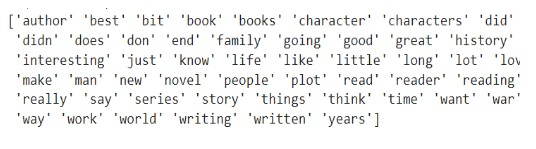

This shows us what TF-IDF learned. They are a bit similar to the BOW, as they come from very similar nature.

In [ ]:
from scipy import sparse
import numpy as nps


# Save the TF-IDF matrix
sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)


np.save('tfidf_vectorizer_features.npy', vectorizer.get_feature_names_out())

Now saving a df with the features.

In [ ]:
tfidf_dense = tfidf_matrix.todense()

tfidf_df = pd.DataFrame(tfidf_dense, columns=vectorizer.get_feature_names_out())

df_combined = pd.concat([df_filtered.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
df_combined.to_csv("/content/drive/MyDrive/df_tf_idf.csv")

### Extracting features using SBert

In order to try a different approach, we have decided to use a more "advanced" model creating embeddings. We have adopted Sentence-BERT (SBERT) to generate embeddings from the reviewText column. Unlike traditional method SBERT transforms each review into a dense vector representation that captures semantic meaning and context. This approach allows the system to understand the inherent similarity between reviews based on their content, rather than just word frequency or occurrence.

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
df_filtered=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

In [ ]:
import torch
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm
import numpy as np
import gc

# Load SBERT model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'  # A smaller, efficient SBERT model
model = SentenceTransformer(model_name)

# Check if GPU is available and move model accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)

batch_size = 500
embeddings_save_dir = "/content/drive/MyDrive/distilled/"
all_embeddings = []

df_filtered = pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

for i in tqdm(range(0, len(df_filtered), batch_size), desc="Processing batches"):
    batch_texts = df_filtered["reviewText"].iloc[i: i + batch_size].tolist()

    batch_embeddings = model.encode(batch_texts, batch_size=batch_size, show_progress_bar=False, convert_to_tensor=True, device=device)

    all_embeddings.extend(batch_embeddings.cpu().numpy())

    torch.cuda.empty_cache()
    gc.collect()

np.save(f"{embeddings_save_dir}sbert_embeddings.npy", all_embeddings)

all_embeddings = np.load(f"{embeddings_save_dir}sbert_embeddings.npy", allow_pickle=True)
df_filtered["embeddings"] = list(all_embeddings)

df_filtered.to_csv(f"{embeddings_save_dir}sbert_embeddings.csv", index=False)


## Dimensionality reduction

A common problem we encountered was working with a large number of features. To avoid the curse of dimensionality and obtain results that are interpretable and usable, we used dimensionality reduction

In [ ]:
bow_df_for_dr=pd.read_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
#concating with the entire df
bow_df_for_dimensionality_reduction=pd.concat([bow_df_for_dr,df_filtered],axis=1)

keeping all of bow, overall(rating) and the style column


In [ ]:
bow_df_for_dimensionality_reduction_filtered=bow_df_for_dimensionality_reduction.iloc[:, list(range(1, 51))]

### PCA

First we resorted to PCA, as the most common and one of the fastest method, which does not require chunks in order to fit into the RAM.

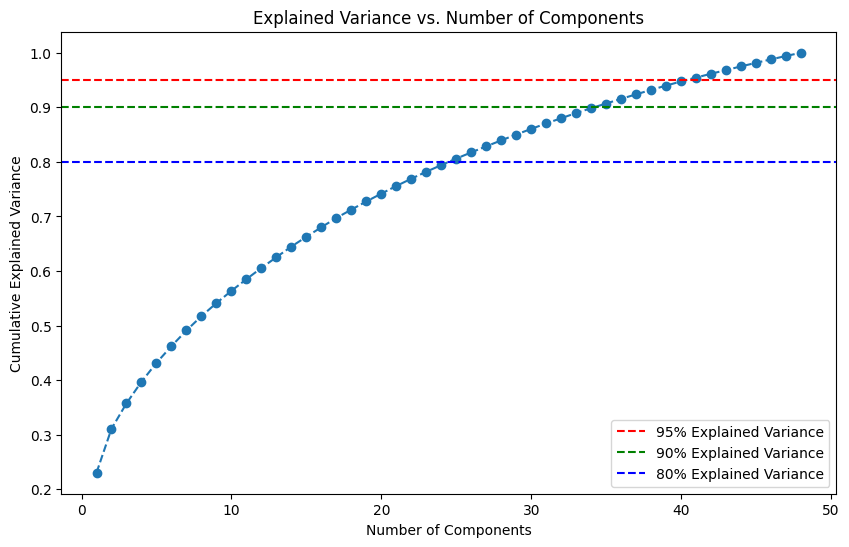

Number of components that explain 95% of the variance: 41
Number of components that explain 90% of the variance: 35
Number of components that explain 80% of the variance: 25


In [ ]:
from sklearn.decomposition import PCA

X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2]

pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.80, color='b', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()

# Determine the number of components that explain **% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components_95}')


n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Number of components that explain 90% of the variance: {n_components_90}')

n_components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f'Number of components that explain 80% of the variance: {n_components_80}')


This graph allows us to understand the ideal number of components for our needs. As much as we would like to use all 50 features, it is better under our computational limits to use only 25 as they explain 80% of the variance, which is satisfactory for the current needs.

Next we will merge it back to the original df and save it for future use.

In [ ]:
n_components_80 = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f'Number of components that explain 80% of the variance: {n_components_80}')

pca = PCA(n_components=n_components_80)
X_pca = pca.fit_transform(X)

pca_columns = [f'pca_{i+1}' for i in range(n_components_80)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

df_with_pca = pd.concat([bow_df_for_dimensionality_reduction_filtered.reset_index(drop=True), pca_df], axis=1)

df_with_pca.head()

Number of components that explain 80% of the variance: 25


author  best  bit  book  books  character  characters  did  didn  does  \
0       0     0    0     1      0          0           0    0     0     0   
1       0     0    0     1      0          0           0    0     0     0   
2       0     0    0     0      0          0           0    0     0     1   
3       0     0    1     2      0          0           0    0     0     0   
4       0     0    0     2      1          0           0    0     0     0   

   ...    pca_16    pca_17    pca_18    pca_19    pca_20    pca_21    pca_22  \
0  ... -0.038481 -0.078307  0.020229 -0.041195  0.015170 -0.156939 -0.091354   
1  ... -0.021586 -0.182302  0.063954 -0.282469 -0.053524 -0.172129 -0.184945   
2  ... -0.457261  0.146258 -0.690896  0.245567  1.344517  0.455241 -0.932067   
3  ... -0.189481 -0.147345  0.018533 -0.343236 -0.401939  0.278119 -0.197931   
4  ...  0.100168 -0.629470  0.395732  0.362874  0.099025 -0.100332 -0.158631   

     pca_23    pca_24    pca_25  
0 -0.119762 -0.136349  0.114998  
1  0.164420 -0.132883 -0.125049  
2  0.751194  0.680877  0.274272  
3 -0.112132 -0.165749  0.011193  
4  0.328904 -0.290690  0.202078  

[5 rows x 75 columns]

In [ ]:
df_with_pca.to_csv("/content/drive/MyDrive/df_with_pca.csv")

### t-SNE

t-SNE is another dimensionality reduction technique, which is suitable and deemed a good use for text because it can capture complex, non-linear relationships between words or documents, making it effective for visualizing semantic similarity. Additionally, t-SNE can handle high-dimensional and sparse data, which are common characteristics of text data. Furthermore, the visualizations produced by t-SNE can provide intuitive insights into the structure and topics present in a text dataset.

Unfortunality, t-SNE took forever to run, even when we chose the minimal values possible. In order to overcome this obstacle, we decided to try using PCA first and then t-SNE. We chose 40% of the variance just to get a sense of what will happen with this data, and even this small amount of dimensions took way way too long to run, realising that with the current data and computation power, we simply cannot run T-SNE, making it unsuitable for our needs.
Thus, we have decided to use only 5000 samples- just to get to know the tool and see if we might be missing anything of great importance by deciding to neglect this.

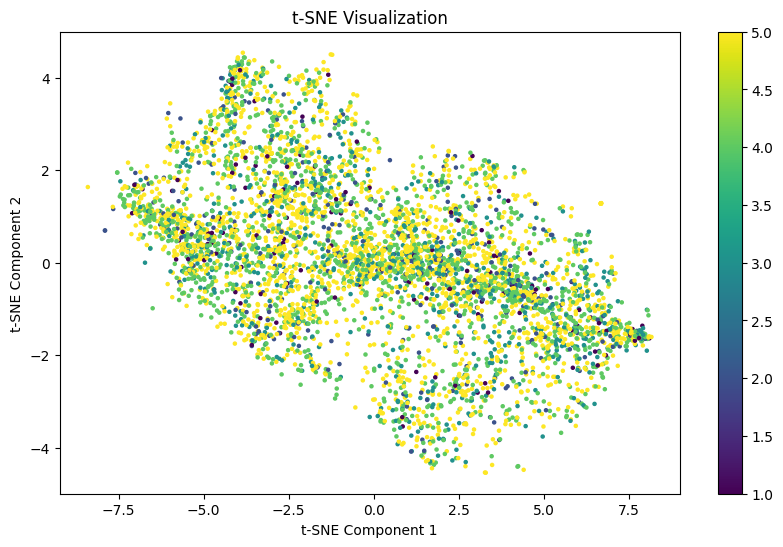

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2].head(5000)

# Apply t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, perplexity=15, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=bow_df_for_dimensionality_reduction_filtered['overall'].head(5000), cmap='viridis', s=5)
plt.colorbar()
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

The results of running this algorithm has shown no significant patterns or clsutering visible to the maked eye.

### UMAP

UMAP works in a similar fashion to t-SNE with different distribution assumptions of the data and loss functions.

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

# Exclude the last two columns (overall and style)
X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2]
# Apply UMAP
reducer = umap.UMAP(n_components=3,n_neighbors=40)
X_umap = reducer.fit_transform(X)

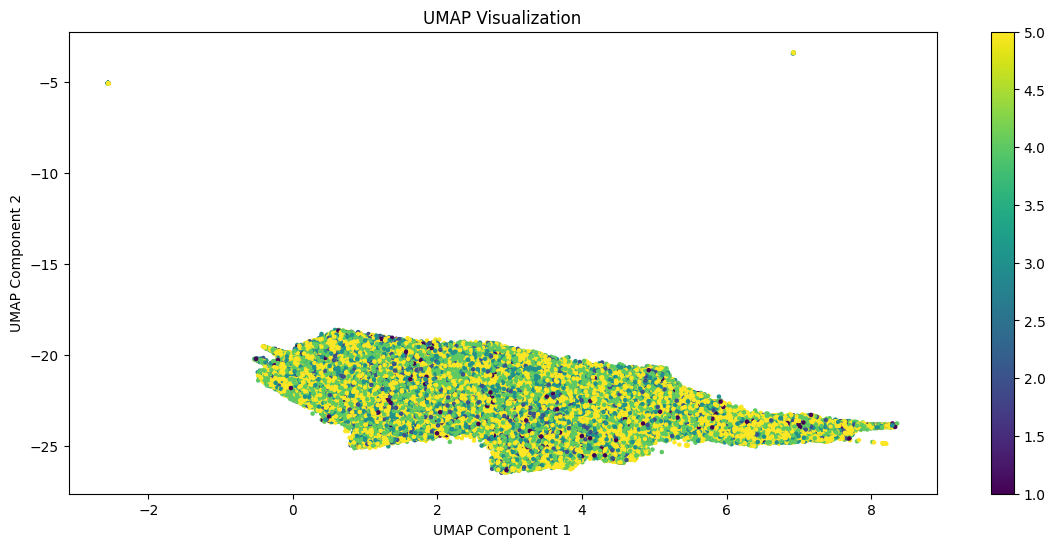

In [ ]:
# Plot UMAP results
plt.figure(figsize=(14, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=bow_df_for_dimensionality_reduction['overall'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

After trying several paramters tuning which were relevant to our data, we have decided to show this one. This dimensionality reduction is not successful and probably the data with BOW does not fit into this method.

## Clustering

An important note before trying to create clustering is that clusters already exist in our data in two senses: one is that each user is her own cluster, and another is that each book is its own cluster.

### DBSCAN

We would start by clustering with features extracted using tf-idf. Clustering based on the text of the reviews as tf-idf will group reviews by similarity in terms of word usage and topic presence.



In [ ]:
tfidf_df = pd.read_csv("/content/drive/MyDrive/df_tf_idf.csv")


We needed to create some preprocess, explaining the style, as well as scaling numerical features for the clustering process to be more efficient.

In [ ]:
tfidf_df.drop(columns=['Unnamed: 0', '__index_level_0__', 'reviewerID', 'asin'], inplace=True)

tfidf_df['verified'] = tfidf_df['verified'].astype(int)

style_mapping = {
    "{'Format:': ' Hardcover'}": 1,
    "{'Format:': ' Mass Market Paperback'}": 2,
    "{'Format:': ' Paperback'}": 3,
    "{'Format:': ' Kindle Edition'}": 4
}

# Apply the mapping to the style column
tfidf_df['style'] = tfidf_df['style'].map(style_mapping)
features = [col for col in tfidf_df.columns if col not in ['reviewText', 'summary']]
from sklearn.preprocessing import StandardScaler
# Scale the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(tfidf_df[features])


We want to create a visuzliation of the dbscan to see how the clusters look like.

In order for the algorithm to work, we had to create another dimensionality reduction, with 5 components this time. Then we ran dbscan and then another PCA in order to create a visualization.

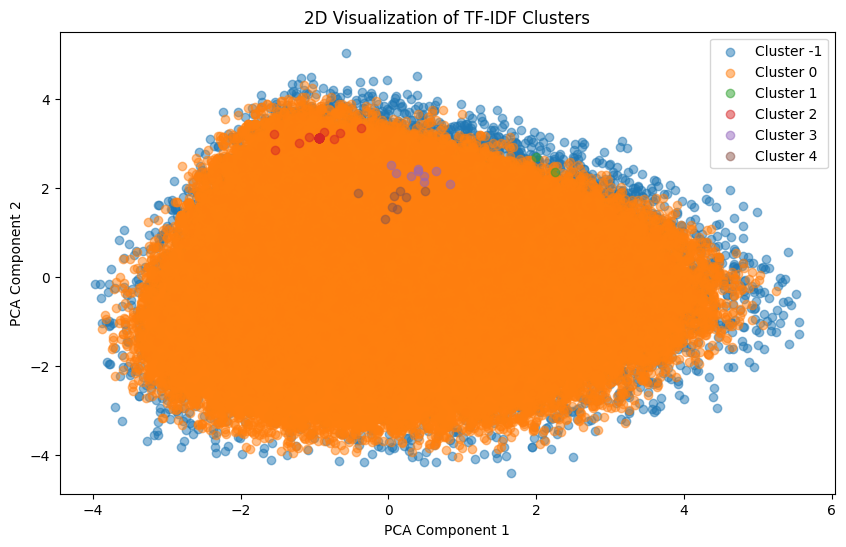

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

dbscan_tfidf_reduced = DBSCAN(eps=0.65, min_samples=10)
tfidf_df['cluster_tfidf_reduced'] = dbscan_tfidf_reduced.fit_predict(X_reduced)

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_reduced)

tfidf_df['PCA1_reduced'] = X_2d[:, 0]
tfidf_df['PCA2_reduced'] = X_2d[:, 1]

plt.figure(figsize=(10, 6))
for cluster in sorted(tfidf_df['cluster_tfidf_reduced'].unique()):
    cluster_data = tfidf_df[tfidf_df['cluster_tfidf_reduced'] == cluster]
    plt.scatter(cluster_data['PCA1_reduced'], cluster_data['PCA2_reduced'], label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of TF-IDF Clusters')
plt.legend()
plt.show()


We have tried many values for the algorithm including: varied amount of dimension before applying the dbscan algorithm, different values for epsilon, and different values for the min_samples. In each case we ended up with small clusters, large number of noise points and overlapping clusters.
Our conclusion is that data does not have clear separations that DBSCAN can identify with the tested parameters.

We would now move to clustering using the data that contains the features extracted using sbert.

In [ ]:
additional_data = pd.read_csv('/content/drive/MyDrive/distilled/sbert_embeddings.csv')
sbert_embeddings = np.load('/content/drive/MyDrive/distilled/sbert_embeddings.npy')

In this again we needed to format the style and use PCA.

In [ ]:
from sklearn.decomposition import PCA

additional_data.drop(columns=['Unnamed: 0', '__index_level_0__', 'reviewerID', 'asin'], inplace=True)
additional_data['verified'] = additional_data['verified'].astype(int)
style_mapping = {
    "{'Format:': ' Hardcover'}": 1,
    "{'Format:': ' Mass Market Paperback'}": 2,
    "{'Format:': ' Paperback'}": 3,
    "{'Format:': ' Kindle Edition'}": 4
}
additional_data['style'] = additional_data['style'].map(style_mapping)
features_to_scale = ['overall', 'verified', "style"]

scaler = StandardScaler()
scaled_additional_features = scaler.fit_transform(additional_data[features_to_scale])
scaled_embeddings = scaler.fit_transform(sbert_embeddings)

combined_features = np.hstack([scaled_additional_features, scaled_embeddings])

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(combined_features)

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=15)
additional_data['cluster'] = dbscan.fit_predict(X_reduced)

In [ ]:
additional_data.to_csv("/content/drive/MyDrive/clustered_embeddings_data.csv", index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


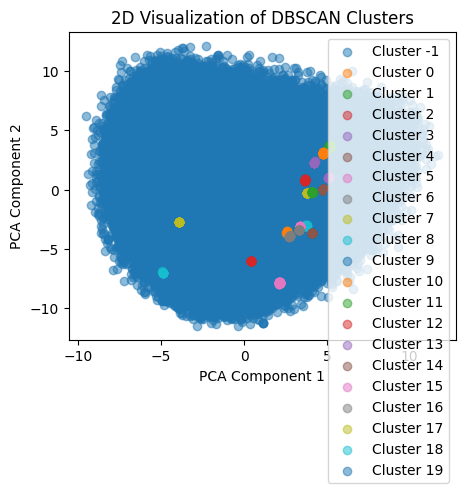

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_reduced)
plot_data = pd.DataFrame(X_2d, columns=['PCA1', 'PCA2'])
plot_data['cluster'] = additional_data['cluster']
plt.figure(figsize=(5, 4))
for cluster in sorted(plot_data['cluster'].unique()):
    cluster_data = plot_data[plot_data['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of DBSCAN Clusters')
plt.legend()
plt.show()


Once again,  the clusters are not distinctly separated. This might indicate that DBSCAN with the current parameter settings is not effectively capturing the natural groupings in our data, and trying with further tuning of "eps" and "min_samples" as well as n_components of the pca before clustering, didn't seem to change the situation. Our conclusion is that DBSCAN is not suitable for this dataset. Next, we would use K-Means to try other clustering method.

The next function is used to perform K-means clustering and plotting for both of the dataframes containing the features extracted from 1. tfidf and 2. sbert dataframe.

In [ ]:
from sklearn.cluster import KMeans
def kmeans_clustering_and_plotting(df, n_clusters, title, output_file):
    features = [col for col in df.columns if col not in ['reviewText', 'summary', 'cluster']]
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    pca = PCA(n_components=0.85)
    X_reduced = pca.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_reduced)
    df['cluster'] = kmeans.labels_

    df.to_csv(output_file, index=False)

    pca_2d = PCA(n_components=2)
    X_2d = pca_2d.fit_transform(X_reduced)

    df_2d = pd.DataFrame(X_2d, columns=['PCA1', 'PCA2'])
    df_2d['cluster'] = df['cluster']

    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = df_2d[df_2d['cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.5)

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


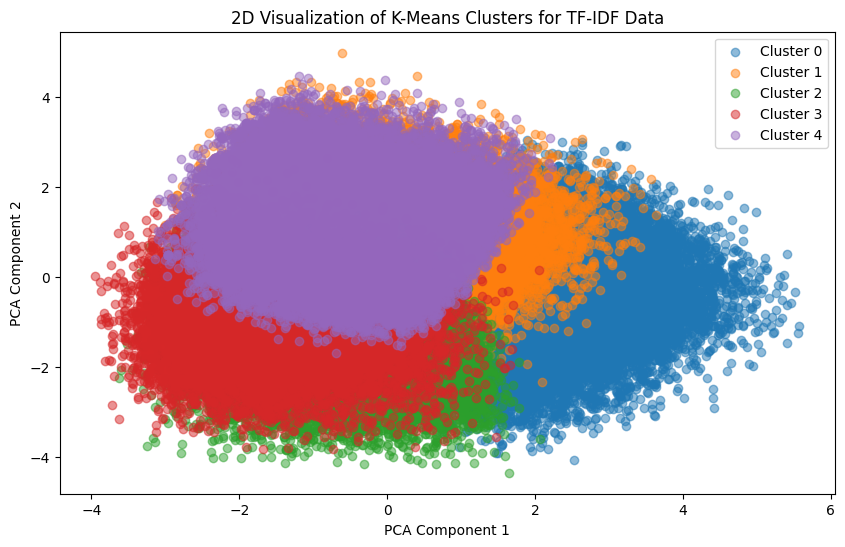

In [ ]:
kmeans_clustering_and_plotting(tfidf_df, n_clusters=5, title='2D Visualization of K-Means Clusters for TF-IDF Data', output_file="/content/drive/MyDrive/clustered_tfidf.csv")

This visualization shows us once again that the clusters are not seperated. Despite creating several clusters, they merge into one another and this is also a result of the way K means work.

Next we crate K means visualization for the s embeddings

In [ ]:
additional_data.head()

overall  verified  style  \
0        5         0      1   
1        5         0      1   
2        5         0      1   
3        4         0      1   
4        5         0      1   

                                          reviewText  \
0  Over and over the king has problems.  Fortunat...   
1  This was a favorite. I think it changed my lif...   
2  In this early reader, Dr. Seuss explores the c...   
3  Dr. Suess's scansion and made-up words annoy m...   
4  Christopher Kremmer's book takes you on a jour...   

                                          summary  \
0                                   Not Nice Mice   
1                                 Changed my life   
2             Two thumbs up for this early reader   
3  A fine first read with wonderful illustrations   
4                               A compelling read   

                                          embeddings  
0  [-3.69857103e-02  6.62791803e-02  3.47475000e-...  
1  [-5.97363301e-02  1.75622925e-02  2.33366285e-...  
2  [ 5.52748293e-02 -1.34186642e-02  7.35510215e-...  
3  [ 3.01924106e-02  1.63982231e-02 -1.87582988e-...  
4  [-5.37788495e-02  5.34100458e-02  4.65276971e-...

In [ ]:
additional_data = pd.read_csv('/content/drive/MyDrive/distilled/sbert_embeddings.csv')
sbert_embeddings = np.load('/content/drive/MyDrive/distilled/sbert_embeddings.npy')

additional_data.drop(columns=['Unnamed: 0', '__index_level_0__', 'reviewerID', 'asin'], inplace=True)

style_mapping = {
    "{'Format:': ' Hardcover'}": 1,
    "{'Format:': ' Mass Market Paperback'}": 2,
    "{'Format:': ' Paperback'}": 3,
    "{'Format:': ' Kindle Edition'}": 4
}
additional_data['style'] = additional_data['style'].map(style_mapping)
features_to_scale = ['overall', 'verified', 'style']

scaler = StandardScaler()
scaled_additional_features = scaler.fit_transform(additional_data[features_to_scale])
scaled_embeddings = scaler.fit_transform(sbert_embeddings)

combined_features = np.hstack([scaled_additional_features, scaled_embeddings])

combined_columns = features_to_scale + [f'feature_{i}' for i in range(scaled_embeddings.shape[1])]

combined_df = pd.DataFrame(combined_features, columns=combined_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


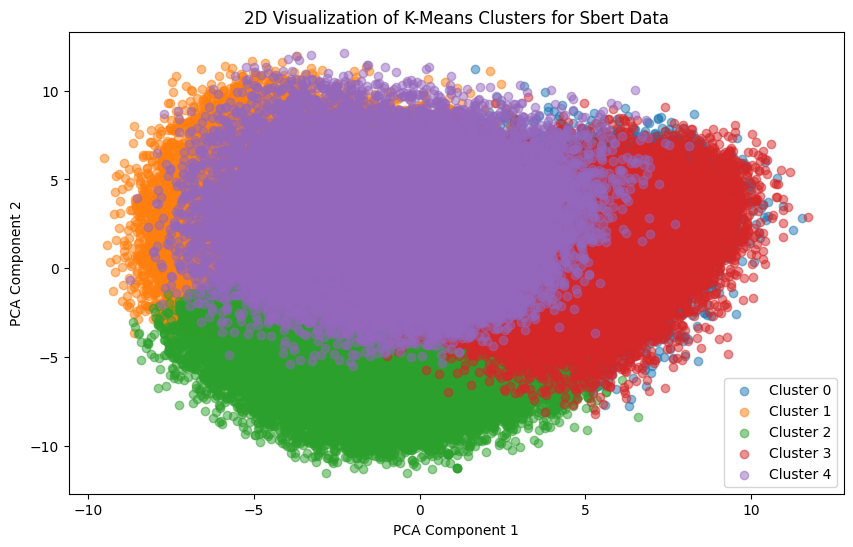

In [ ]:
kmeans_clustering_and_plotting(combined_df, n_clusters=5, title='2D Visualization of K-Means Clusters for Sbert Data', output_file="/content/drive/MyDrive/clustered_sbert.csv")


Once again we get clusters that merge into each other without clear distinction.

We will now compare the clustering using k-means with tf-idf and kmeans clustering with newer model for feature extraction, sbert:

In [ ]:
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(df, n_clusters_range, title):
    features = [col for col in df.columns if col not in ['reviewText', 'summary', 'cluster']]

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    pca = PCA(n_components=0.85)
    X_reduced = pca.fit_transform(X)

    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_reduced)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_reduced, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.plot(n_clusters_range, silhouette_scores, marker='o', label=title)

n_clusters_range = range(2, 11)  # Evaluate from 2 to 10 clusters

plt.figure(figsize=(12, 8))

plot_silhouette_scores(tfidf_df, n_clusters_range, 'TF-IDF')

plot_silhouette_scores(combined_df, n_clusters_range, 'SBERT')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for TF-IDF and SBERT')
plt.legend()
plt.show()

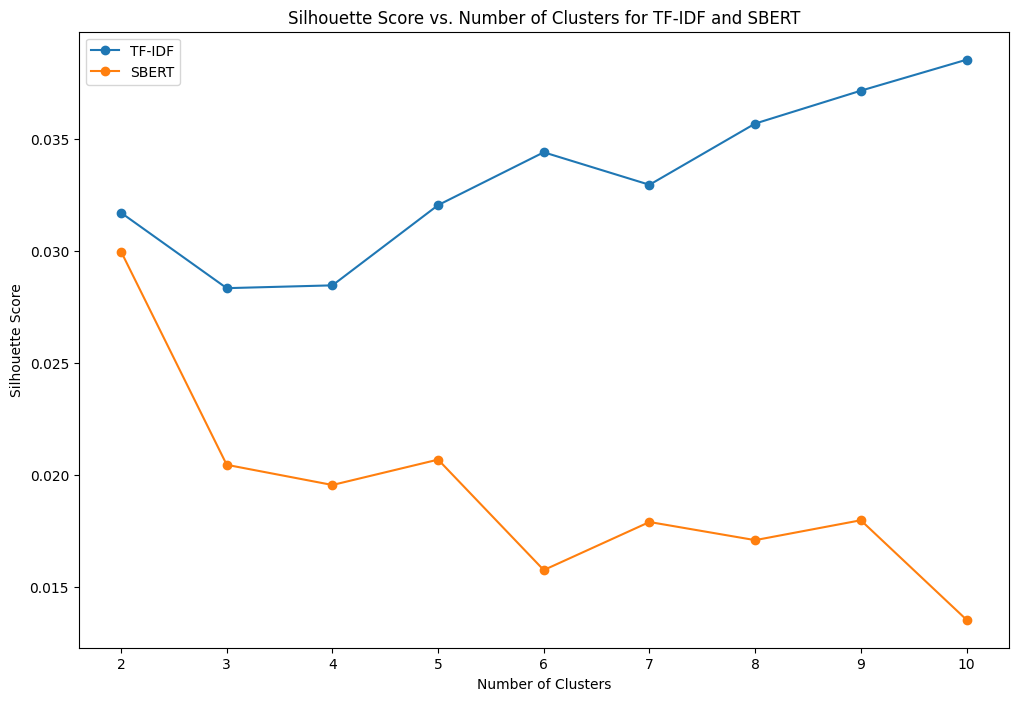

We experimented with various values of k across different clustering algorithms, focusing on TF-IDF and SBERT representations. Clustering data is meant for grouping similar items together and identifying patterns within the dataset. Despite our efforts to optimize the clustering process, the silhouette scores were extremely close to 0 (whereas it should ideally be close to 1), indicating that our data does not form well-defined clusters. Consequently, the clustering quality is poor at best, with significant overlap between clusters and a lack of clear separation. Based on these results, we conclude that our recommendation systems would perform better without relying on these clustering values, and we should explore alternative approaches to organize and analyze our data.

## Sentiment

#### Adding sentiment

Since our data is composed of reviews for book products bought on Amazon, we would like to use the review texts themselves and try to gain some more valuable information than plain rating that the reviewers gave to the product. One such way, is to use an already pre-trained models, a one that is based on a known one such as BERT. We will use it in order to extract the sentiment of the review.





We chose to use distilbert-base-uncased-finetuned-sst-2-english model which performance  is considered good and is much more efficient to run and finetuned. For each text returns "NEGATIVE", or "POSITIVE" and a number between 0.5 and 1, representing how much positive or negative the sentiment is.

In [ ]:
from transformers import pipeline, DistilBertTokenizer

sentiment_analysis = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In the following code, we first created a method that uses the summary if it exists, and only if it doesn't, we would get the sentiment of the full review text. By manually examining the created sentiment, we saw that the sentiment of the summary usually generated poor results. For example, a row with a 5-star rating that had a summary "try it" got 0.6 in the positive sentiment (range is 0.5-1), which means it wasn't adding information for our model.
Then, after observing that sometimes a 3-star review might have very critical text, and some of the 3-star records actually have pretty good reviews, we decided to run the sentiment analysis on the full review text. However, due to the limitation of 512 tokens maximum passed to sentiment models, and due to the amount of data that needs to be processed for sentiment analysis (as well as lack of resources in terms of time and memory), we decided to take only the first 512 tokens.
For some reason, even that was too much for the sentiment model, so we decreased it further. Now the model is using only the first 510 tokens from every review.

In [ ]:
def get_sentiment_score(row):
    text = row['reviewText']
    if pd.isna(text):
        return None  # Return None if  reviewText is missing

    # Tokenize the text and truncate to the first 510 tokens
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    # Convert tokens back to text string if necessary
    truncated_text = tokenizer.decode(tokens)
    # Perform sentiment analysis
    result = sentiment_analysis(truncated_text)[0]
    if result['label'] == "NEGATIVE":
        score = -result['score']
    else:
        score = result['score']
    return (score, result['label'])  # Return tuple

result_df['sentiment_result'] = result_df.apply(get_sentiment_score, axis=1)

In [ ]:
result_df.head(3)

overall      reviewerID        asin                      style  \
0        5  A3H9YD6K9TVKDP  0001713353  {'Format:': ' Hardcover'}   
1        5  A3QYDL5CDNYN66  0001061240  {'Format:': ' Hardcover'}   
2        5  A1BNWEJ7RVPLQ1  0001712799  {'Format:': ' Hardcover'}   

   __index_level_0__ extracted_category  sentiment_category  
0                 15   Children's Books                   0  
1                 47   Children's Books                   3  
2                 72   Children's Books                   3

For the first 1000 records, we show some statistics about the results of the model

In [ ]:
result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)
print(result_df_head.head())

   Unnamed: 0  overall  verified      reviewerID        asin  \
0          15        5     False  A3H9YD6K9TVKDP  0001713353   
1          47        5     False  A3QYDL5CDNYN66  0001061240   
2          72        5     False  A1BNWEJ7RVPLQ1  0001712799   
3          98        4     False  A3CKPNSGA7JOLK  0001712799   
4         106        5     False  A2MOBMVHECYVLE  0002006448   

                       style  \
0  {'Format:': ' Hardcover'}   
1  {'Format:': ' Hardcover'}   
2  {'Format:': ' Hardcover'}   
3  {'Format:': ' Hardcover'}   
4  {'Format:': ' Hardcover'}   

                                          reviewText  \
0  Over and over the king has problems.  Fortunat...   
1  This was a favorite. I think it changed my lif...   
2  In this early reader, Dr. Seuss explores the c...   
3  Dr. Suess's scansion and made-up words annoy m...   
4  Christopher Kremmer's book takes you on a jour...   

                                          summary  __index_level_0__  \
0            

<ipython-input-10-6395239f7345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)
<ipython-input-10-6395239f7345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)


In [ ]:
result_df_head["sentiment_label" ].value_counts()

sentiment_label
POSITIVE    742
NEGATIVE    258
Name: count, dtype: int64

In [ ]:
result_df_head["sentiment_score" ].describe()

count    1000.000000
mean        0.479695
std         0.844819
min        -0.999821
25%        -0.629244
50%         0.994564
75%         0.999077
max         0.999890
Name: sentiment_score, dtype: float64

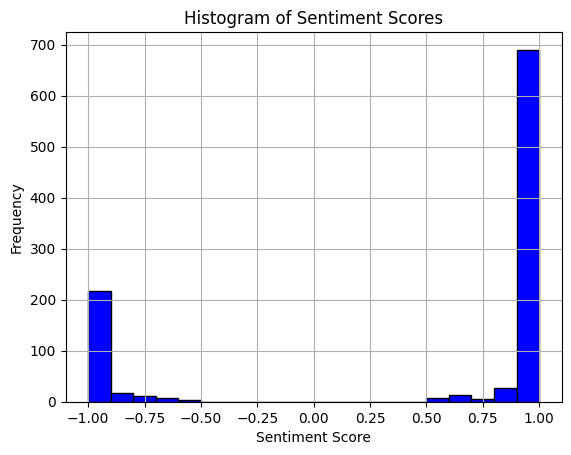

In [ ]:
import matplotlib.pyplot as plt
# Creating a histogram of the sentiment scores
plt.hist(result_df_head["sentiment_score"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As we can see from our sample data, most of the data extracted from the review text is either very close to 1 or -1, meaning very positive or very negative, and there is a minority that falls between 0.5-0.9 or -0.5 and -0.9. The reason why there is no data between -0.5 and 0.5 is that the sentiment originally ranges from 0.5-1 for either positive or negative, which means that a positive 0.4 is equal to a negative 0.6, so the model is trained to classify the sentiment as either negative or positive. Because of this distribution of the data, we would like to perform discretization, so eventually, there would be only four values for the sentiment: values that are positive and above 0.9 would be classified as "loved," whereas those below that would be "liked." For negative sentiment, we would define values above 0.9 as "hated," and those below as "disliked.

In [ ]:
def get_sentiment_category(text):
    if pd.isna(text):
        return None

    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    truncated_text = tokenizer.decode(tokens)

    result = sentiment_analysis(truncated_text)[0]
    score = result['score']
    sentiment = result['label']

    if sentiment == "POSITIVE":
        if score > 0.9:
            category = 3 # "Loved"
        else:
            category = 2 # "Liked"
    elif sentiment == "NEGATIVE":
        if score > 0.9:
            category = 0 # "Hated"
        else:
          category = 1 # "Disliked"

    return category  # Return the category
result_df['sentiment_category'] = result_df["reviewText"].apply(get_sentiment_category)
result_df = result_df.drop(columns=["verified", "reviewText", "summary"])
result_df.to_parquet('/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_1_with_sentiment.parquet')
result_df.head()


We want to see the distribution of the sentiments.


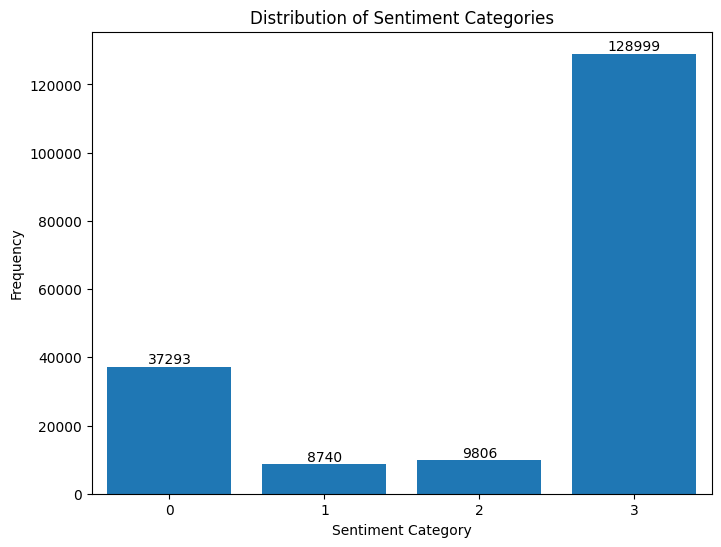

In [ ]:
value_counts=result_df["sentiment_category"].value_counts().sort_index()
# Create a bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, tick_label=value_counts.index)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Set the x-axis limits
plt.xlim(-0.5, 3.5)

# Labeling the axes
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')

# Show the plot
plt.xticks(range(4))
plt.show()


As expected, mostly "hated" and "loved" are the most common reviews given. This is however not in linear fashion as to the first distribution we saw of how the ratings are scattered.

### Bertviz

\We wanted to use Bertviz because BertViz is a tool designed to visually interpret and explore the inner workings of BERT (Bidirectional Encoder Representations from Transformers) and other transformer models. It provides interactive visualizations of attention heads and attention patterns, allowing users to see how different parts of the input influence each other during model processing. This helps users understand the decision-making process of transformer models by making the complex attention mechanisms more transparent, helping them understand why the sentiment analysis occurred as it did.

In [ ]:
pos_bertviz=df_filtered[(df_filtered['reviewerID']=="A1SER5HLPRY6SB") & (df_filtered['asin']=="0001844423")]

In [ ]:
neg_bertviz=df_filtered[(df_filtered['reviewerID']=="A1B9VX6MZ0MZ1T") & (df_filtered['asin']=="0001844423")]


overall      reviewerID        asin                                  style  \
6        3  A1B9VX6MZ0MZ1T  0001844423  {'Format:': ' Mass Market Paperback'}   

   __index_level_0__        extracted_category  sentiment_category  
6               7555  Christian Books & Bibles                   0

We have two unique reviews, one with sentiment category of 3 and one with 0. As running Bertviz continually crushed our sessions, no matter what tricks/computers/ways we worked with, we understood it is of great problem. Also, the sentiment model we chose does not have any bertviz available inside it, as it is very fine tuned and very specific. Thus we have resorted to original and classic BERT models and we will visualize with bertviz for one positive sentiment and one negative to get a sense of what the model "learned".

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from bertviz import head_view, model_view

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
review = pos_bertviz['reviewText'].iloc[0]

# Tokenize and encode the input review
inputs = tokenizer.encode_plus(
    review,
    return_tensors='pt',
    add_special_tokens=True,
    max_length=52,
    truncation=True,
    padding='max_length'
)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']


In [ ]:
# Get model outputs
outputs = model(input_ids, attention_mask=attention_mask, output_attentions=True)

# Visualize attention
attention = outputs.attentions  # Get attention scores
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])


In [ ]:
head_view(attention, tokens)

Due to gitlab failure when rendering the bertviz, the ouput of this part can be found in this notebook that has only the ouput of bertviz: https://colab.research.google.com/drive/1o1iBmiBNCLi0oNnxmWqSmOCWAhVNEM12?usp=drive_link


## negative review

In [ ]:
review = neg_bertviz['reviewText'].iloc[0]

# Tokenize and encode the input review
inputs = tokenizer.encode_plus(
    review,
    return_tensors='pt',
    add_special_tokens=True,
    max_length=52,
    truncation=True,
    padding='max_length'
)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']


In [ ]:
outputs = model(input_ids, attention_mask=attention_mask, output_attentions=True)

attention = outputs.attentions  # Get attention scores
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])


In [ ]:
head_view(attention, tokens)

Due to gitlab failure when rendering the bertviz, the ouput of this part can be found in this notebook that has only the ouput of bertviz: https://colab.research.google.com/drive/1o1iBmiBNCLi0oNnxmWqSmOCWAhVNEM12?usp=drive_link

Unfortunately this was not a successful case of Bertviz. By looking at the different layers, we saw that the model "learned" mostly none words, or not important ones. This can be the result of using a different model than the one made for sentiment, or an unlucky randomized choice of text.

### Logistic regression

We have a model for extracting sentiment using Hugging Face, and a straightforward comparison would be to use logistic regression for predicting sentiments.


To conduct this comparison, we use the already created BOW DataFrame to perform a three-level logistic regression. The model is trained on 80% of the dataset, and we then compare the results of the remaining 20% from the logistic regression with the sentiment analysis conducted by the Hugging Face model. The comparison will focus solely on the positive and negative sentiments, excluding those that are slightly negative or slightly positive.

In [ ]:
df_for_logistic=pd.read_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
df_to_merge_logistic=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

In [ ]:
merged_logistics=pd.concat([df_to_merge_logistic.reset_index(drop=True), df_for_logistic.reset_index(drop=True)], axis=1)


In [ ]:
merged_logistics.drop(['Unnamed: 0'],axis=1,inplace=True)

We import sklearn logistic regression model and create classification and accuracy reports.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = merged_logistics.iloc[:, 8:58]  # Features (columns 8 to 57 inclusive)
y = merged_logistics['overall'].apply(lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive'))  # Target labels

# Calculate the split index 80% of first rows
split_index = int(0.8 * len(merged_logistics))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Create the 'sentiment' column
merged_logistics['sentiment'] = ''
merged_logistics.loc[:split_index, 'sentiment'] = y_train  # Training set sentiment
merged_logistics.loc[split_index:, 'sentiment'] = y_pred  # Test set sentiment

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.779328253859544

Classification Report:
               precision    recall  f1-score   support

    negative       0.40      0.04      0.07      2345
     neutral       0.39      0.04      0.07      5375
    positive       0.79      0.99      0.88     27323

    accuracy                           0.78     35043
   macro avg       0.53      0.36      0.34     35043
weighted avg       0.70      0.78      0.70     35043



The results shown are not particularly strong, which is expected. This outcome likely stems from the fact that review text does not always accurately reflect the actual rating, as we will explore further. When using logistic regression, we had to compel the model to learn from the available observations because the rating was our sole indicator of the true sentiment behind these reviews.


In [ ]:
merged_logistics.drop(['sentiment'],axis=1,inplace=True)

In [ ]:
merged_logistics.to_csv("/content/drive/MyDrive/dataset_with_logistic_of_sentiment.csv")

## Comparing the sentiment and logistics:
We wanted to check whether the sentiment is more complex and nuanced then simple logistic regression. It seems on the surface it might be, so we would compare and see how much they differ from each other. One should notice, that as we are not going to manually provide the actual sentiment, we cannot really know the correct classifications of either (this also assumes there is a correct classification of sentiment for each review text).

In [ ]:
logistics_to_compare_df=pd.read_csv("/content/drive/MyDrive/dataset_with_logistic_of_sentiment.csv").dropna(subset=['predicted_sentiment'])

In [ ]:
logistics_to_compare_df.head(2)

Unnamed: 0  overall  verified     reviewerID        asin  \
140171      140171        4     False  A7GDKNGJOY4D8  0007444117   
140172      140172        3      True  APGJC13RI61U0  0007444117   

                                 style  \
140171  {'Format:': ' Kindle Edition'}   
140172  {'Format:': ' Kindle Edition'}   

                                               reviewText  \
140171  ***I received this book as a gift\n\nPROS:\nAg...   
140172  After reading the first two, this one seemed t...   

                                                  summary  __index_level_0__  \
140171  Agony. Utter and total desperate, heart-wrench...             218353   
140172                                         Fell Short             218432   

        author  ...  want  war  way  work  world  writing  written  years  \
140171       0  ...     1    1    0     0      0        1        0      0   
140172       0  ...     0    0    0     0      0        0        0      0   

        true_sentiment  predicted_sentiment  
140171        positive             positive  
140172         neutral             positive  

[2 rows x 61 columns]

In [ ]:
logistics_to_compare_df_only_relevant_columns=logistics_to_compare_df[['__index_level_0__','predicted_sentiment']]

In [ ]:
logistics_to_compare_df_only_relevant_columns = logistics_to_compare_df_only_relevant_columns.rename(columns={'predicted_sentiment': 'sentiment_category'})

Reading the sentiment df.

In [ ]:
sentiment_df_for_compare=pd.read_csv("/content/drive/MyDrive/sentiment_without_category_for_nn.csv")

In [ ]:
sentiment_df_for_compare_filtered=sentiment_df_for_compare[sentiment_df_for_compare['__index_level_0__'].isin(logistics_to_compare_df['__index_level_0__'])]


In [ ]:
# Define the mapping
sentiment_mapping = {
    0: 'negative',
    1: 'neutral',
    2: 'neutral',
    3: 'positive'
}

# Apply the mapping
sentiment_df_for_compare_filtered['sentiment_category'] = sentiment_df_for_compare_filtered['sentiment_category'].map(sentiment_mapping)

In [ ]:
# Merge the DataFrames on '__index_level_0__'
merged_df = logistics_to_compare_df_only_relevant_columns.merge(sentiment_df_for_compare_filtered, on='__index_level_0__', suffixes=('_df1', '_df2'))

merged_df['sentiment_match'] = merged_df.apply(lambda row: f"{row['sentiment_category_df1']} {row['sentiment_category_df2']}", axis=1)

sentiment_counts = merged_df['sentiment_match'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_combination', 'count']

# Calculate the total number of matches/mismatches
total_count = sentiment_counts['count'].sum()

# Calculate the percentage for each combination
sentiment_counts['percentage'] = round((sentiment_counts['count'] / total_count) * 100,1)

print(sentiment_counts)

  sentiment_combination  count  percentage
0     positive positive  26187        71.9
1     positive negative   6451        17.7
2      positive neutral   3013         8.3
3      neutral positive    242         0.7
4      neutral negative    219         0.6
5     negative negative    140         0.4
6       neutral neutral     87         0.2
7     negative positive     63         0.2
8      negative neutral     29         0.1


The left part of the combination is the logistic regression and the left is the sentiment extraction.
As we see from the results, the positive and positive were a huge chunk of the data. It is of no surprise, as most reviews were originally positive. However the logistics chose a lot of places to give positive while the sentiment gave negative and neutral, together it sums up to 26% out of the total data set, showing discrepancies between the two methods.

# ***Recommmendation Systems***

In here we set on to the adventure of trying to create recommendation systems. We have decided to try and create 5 different recommendation systems, and then compare their performances. Each one will be explained in detail.

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import ndcg_score
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


We start with the most simple model first

# 1. Matrix Factorization Model

Matrix Factorization model is the one of the basic and foundation stones for recommendation systems. Thus we have started with this simple model.It isn't computational too heavy, and it is well established in the literature.

In [ ]:
!pip install surprise

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['reviewerID', 'asin', 'overall']], reader)

From here on we would use test set of 25% out of the total data we had decided to use.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
mf_predictions = algo.test(testset)

### Saving performance

At the beginning, we started with evaluating the RMSE. However, after a while, we decided to add NDCG and MAP since they prioritize the ranking of recommendations over the absolute accuracy of predicted ratings, which is crucial in scenarios like movie or product suggestions where a precise rating (such as 4.2 vs. 4.5) is less critical than ensuring the most appreciated items top the list. NDCG emphasizes the relevance of items at the start of the recommendation list, where user engagement is highest, enhancing user satisfaction as users typically interact more with these initial recommendations. Similarly, MAP focuses on how well the most relevant items are ranked across all users, rewarding the model for placing relevant items early in the list. This approach aligns closely with business objectives, such as increasing user engagement, satisfaction, and retention, by ensuring that both the quality of the rankings and the most impactful parts of the list are prioritized.

We created an easy to use function for our needs to calculate map

In [ ]:
from sklearn.metrics import label_ranking_average_precision_score

def calculate_map(true_ratings, pred_ratings):
    true_ratings = np.array(true_ratings)
    pred_ratings = np.array(pred_ratings)

    # Create a sorted index based on true ratings, high to low
    ideal_rank = np.argsort(-true_ratings)

    predicted_rank = np.argsort(-pred_ratings)

    # Generate ideal and predicted rank lists
    ideal_rank_list = [np.where(ideal_rank == i)[0][0] for i in range(len(true_ratings))]
    predicted_rank_list = [np.where(predicted_rank == i)[0][0] for i in range(len(true_ratings))]

    # Convert ranks to binary relevance: top X% as relevant
    cutoff_percent = 20
    cutoff = len(true_ratings) * cutoff_percent // 100
    ideal_relevance = [1 if x < cutoff else 0 for x in ideal_rank_list]
    predicted_relevance = [1 if x < cutoff else 0 for x in predicted_rank_list]

    return label_ranking_average_precision_score([ideal_relevance], [predicted_relevance])

In [ ]:
from sklearn.metrics import ndcg_score, mean_squared_error

test_predictions = algo.test(testset)
true_ratings = [pred.r_ui for pred in test_predictions]
pred_ratings = [pred.est for pred in test_predictions]

ndcg = ndcg_score([true_ratings], [pred_ratings])
rmse = mean_squared_error(true_ratings, pred_ratings, squared=False)
map_score = calculate_map(true_ratings, pred_ratings)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")


Metrics:
NDCG: 0.9926
RMSE: 0.8903
MAP: 0.2494


The results of the matrix factorization model would serve as base comparison. For now it is hard to decide whether those results were good or not.

We decided to store that metrics for later use, so we would be able to compare the models without retraining them. So we created such function

In [ ]:
def save_performance_data(model_name, rmse, ndcg, map_score):
    performance_data = {
        'model_name': model_name,
        'rmse': rmse,
        'ndcg': ndcg,
        'map': map_score
    }
    file_path = '/content/drive/MyDrive/models/model_performance.json'

    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        data = []

    data.append(performance_data)

    # Write back to JSON
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)

In [ ]:
save_performance_data('matrix_factorization_model', rmse, ndcg, map_score)

# 2. Collaborative Filtering
Collaborative Filtering is a popular technique used in recommendation systems to predict a user's preferences for items based on the preferences of other users. The fundamental idea is that if two users have agreed on items in the past, they are likely to agree on similar items in the future.

There are two main types of collaborative filtering: User-based Collaborative Filtering and Item-based Collaborative Filtering. User-based focuses on finding similarities between users, while item based focuses on finding similarities between items. In this project we will show item-based models, due to lack of resources. Item-based models generally handle sparsity better than user-based models. In large datasets, especially those with many users and items most users interact with only a small subset of items, leading to a sparse user-item interaction matrix. In addition, Items (like books) usually have more interactions (ratings) than individual users, making it easier to identify patterns in item similarities, even with limited data for some users.

We need to provide the model with the different latent factors.

In [ ]:
n_factors = 5
n_users = df_filtered['reviewerID'].nunique()
n_books = df_filtered['asin'].nunique()

In [ ]:
train_df, test_df = train_test_split(df_filtered, test_size=0.25, random_state=42)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(df_filtered['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(df_filtered['asin'].unique())}

# Convert user and book IDs to integers in the DataFrame
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)



The architecture includes the following components:

User and Book Embeddings:

Embeddings: We use embedding layers to represent users and books as dense vectors in a lower-dimensional space. This approach is chosen to capture the latent factors that influence user preferences and item characteristics.

User and Book Biases:

Bias Terms: To account for inherent biases in the data, we include bias terms for both users and books. These terms capture tendencies such as a user generally giving higher ratings or a book generally receiving higher ratings.

Forward Pass and Interaction Prediction:

Process: The forward method takes in user and book indices, retrieves the corresponding embeddings, and calculates the dot product between the user and book embeddings. This product represents the interaction between the user and the book, to which the user and book biases are added.
Final Prediction: The result is passed through a sigmoid activation function to map it to a value between 0 and 1, which is then scaled to the desired rating range (e.g., between 0 and 5.5, with later fixing those with prediction of 0 to 1 as it is the lowest score). We read from fastai documentation that it was found that networks with range 0-5.5 generally preform better then network with the exact range 1-5. This final output represents the predicted rating for the user-book pair.



In [ ]:
class CollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_factors=5, y_range=(0, 5.5)):
        super(CollaborativeFilteringModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.y_range = y_range

    def forward(self, user_idx, book_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        res = (user_embed * book_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]


This model is straightforward yet powerful, capturing both the interactions between users and books and the inherent biases in the data. It ideally provides a strong foundation for accurate predictions with a relatively simple structure.


In [ ]:
model = CollaborativeFilteringModel(n_users,n_books, n_factors).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

Because later on we want to conduct an error analysis, in here we need to capture the test data set different characteristics and thus creating a customized function. As we also wanted to tailor each network to our needs, we needed to use a lot of code that is somewhat similar but with small changes. This leads to a lot of code that is written for the next systems because we could not use ready made neural networks(unfortunately) and creating a function for our needs is not useful.
We needed to restart sessions between the running of our networks, beacause each one builds on the previous one architecture. This is another reason why we needed to add the code from the CF network each time.

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, user_idx, book_idx, ratings, asins, reviewer_ids):
        self.user_idx = user_idx
        self.book_idx = book_idx
        self.ratings = ratings
        self.asins = asins
        self.reviewer_ids = reviewer_ids

    def __len__(self):
        return len(self.user_idx)

    def __getitem__(self, idx):
        return (self.user_idx[idx],
                self.book_idx[idx],
                self.ratings[idx],
                self.asins[idx],  # Return asins as strings
                self.reviewer_ids[idx])  # Return reviewer IDs as strings


In [ ]:
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)

test_dataset = CustomDataset(
    user_idx_tensor_test,
    book_idx_tensor_test,
    ratings_tensor_test,
    test_df['asin'].values,
    test_df['reviewerID'].values
)

test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


The number of epochs we decided to train each NN was 30, as it seems appropriate to the amount of data we have. We chose the classic Adam optimizer as it is still one of the best that exist, and using loss function of MSE.

In [ ]:
num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx, book_idx, true_ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx).squeeze()

        loss = criterion(pred_ratings, true_ratings)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        predicted_ratings = torch.clamp(predicted_ratings, min=1)

        correct_train_preds += torch.sum(predicted_ratings == true_ratings).item()
        total_train_preds += len(true_ratings)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        cf_predicted_ratings = pd.DataFrame()

        for user_idx, book_idx, true_ratings, asin, reviewerID in test_loader:
            pred_ratings = model(user_idx, book_idx).squeeze()
            loss = criterion(pred_ratings, true_ratings)
            total_test_loss += loss.item()
            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            predicted_ratings = torch.clamp(predicted_ratings, min=1)
            batch_df = pd.DataFrame({
            'asin': np.array(asin),  # No need to use .cpu() since asin is already a numpy array of strings
            'reviewerID': np.array(reviewerID),  # Same for reviewerID
            'true_ratings': true_ratings.cpu().numpy(),
            'pred_ratings': predicted_ratings.cpu().detach().numpy()
        })
            cf_predicted_ratings = pd.concat([cf_predicted_ratings, batch_df], ignore_index=True)
            correct_test_preds += torch.sum(predicted_ratings == true_ratings).item()
            total_test_preds += len(true_ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)


In [ ]:
cf_predicted_ratings.to_csv("/content/drive/MyDrive/cf_predicted_ratings.csv")

We are storing the models with pickle using built-in pytorch saving syntax, after the training process

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf.pth')

In [ ]:
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
model.eval()
pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test).detach().cpu().numpy()
true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test =  true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))

map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")
save_performance_data('cf_with_bias_and_regularization_model', rmse, ndcg, map_score)


Metrics:
NDCG: 0.9866
RMSE: 1.1851
MAP: 0.2171


We will now create a function that will be useful to plot the train and test loss and accuracy, in order to understand the performance of our networks.

In [ ]:
def plot_train_and_test_loss_accuracy():
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

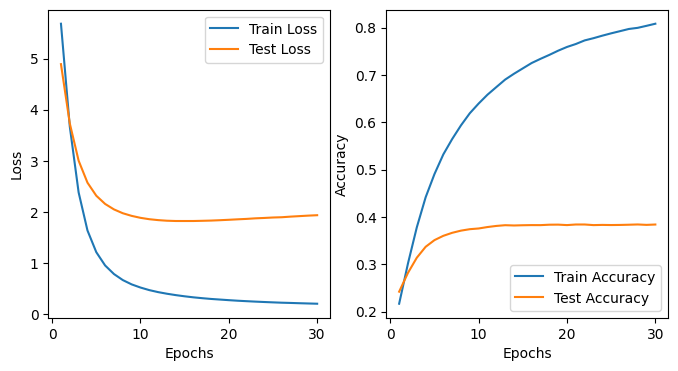

In [ ]:
plot_train_and_test_loss_accuracy()

In here we see the results are not as good as the matrix factorization model. One can also see that the train continutes to improve, while the test doesn't.
This might show overfitting, as we see the test accuracy reaches to plataeu, and it wouldn't make the accuracy better if we run the model for more iterations.

**Adding regularization**

In order to prevent overfitting, we would now try to modify the model that uses regularization. We have run all the previous code for this model, this time with only adding L2 regularization:

In [ ]:
model = CollaborativeFilteringModel(n_users,n_books, n_factors).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

However, even when trying many parameters for the regularization parameter, our results showed that the network now reached to a local minimum, that made the prediction worse:

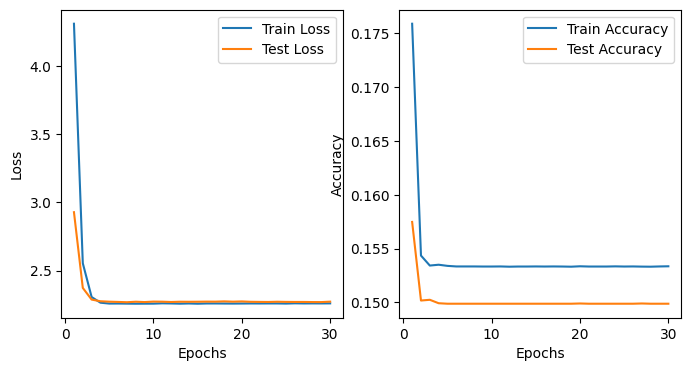

Another example that we tried was chagning the parameter to 0.05:

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.05)

As we saw earlier, we still get to a local minimum which makes our network's performance worse.

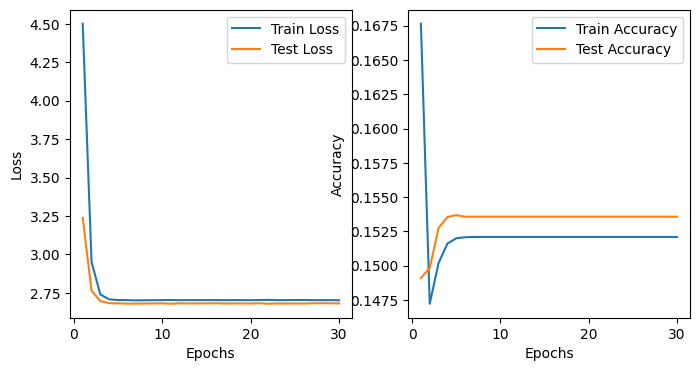

Now we would like to see if we can get recommendation based on our models so far for different users (future work will include to change the recommended books numbers to actually boooks):

In [ ]:
all_users = train_df['user_idx'].unique()
all_books = train_df['book_idx'].unique()

recommendations = []

model.to(device)

# Collect recommendations
with torch.no_grad():
    for user in all_users:
        user_idx_tensor = torch.LongTensor([user] * len(all_books)).to(device)
        book_idx_tensor = torch.LongTensor(all_books).to(device)
        pred_ratings = model(user_idx_tensor, book_idx_tensor).squeeze()
        top_books_idx = torch.argsort(pred_ratings, descending=True)[:10].cpu()
        top_books = all_books[top_books_idx]
        recommendations.extend(top_books.tolist())  # Collect all recommended books

# Count occurrences of each book
book_counts = pd.Series(recommendations).value_counts()

# Get top recommended books and their counts
top_books = book_counts.head(10)
top_books_idx = top_books.index.tolist()

# Print top recommended books with counts
print("Top Recommended Books:")
for book_idx in top_books_idx:
    print(f"Book ID: {book_idx}, Count: {top_books[book_idx]}")

Top Recommended Books:
Book ID: 32709, Count: 2278
Book ID: 3899, Count: 2165
Book ID: 10108, Count: 1950
Book ID: 26654, Count: 1944
Book ID: 17619, Count: 1856
Book ID: 30796, Count: 1618
Book ID: 11017, Count: 1596
Book ID: 31574, Count: 1542
Book ID: 30232, Count: 1323
Book ID: 25999, Count: 1301


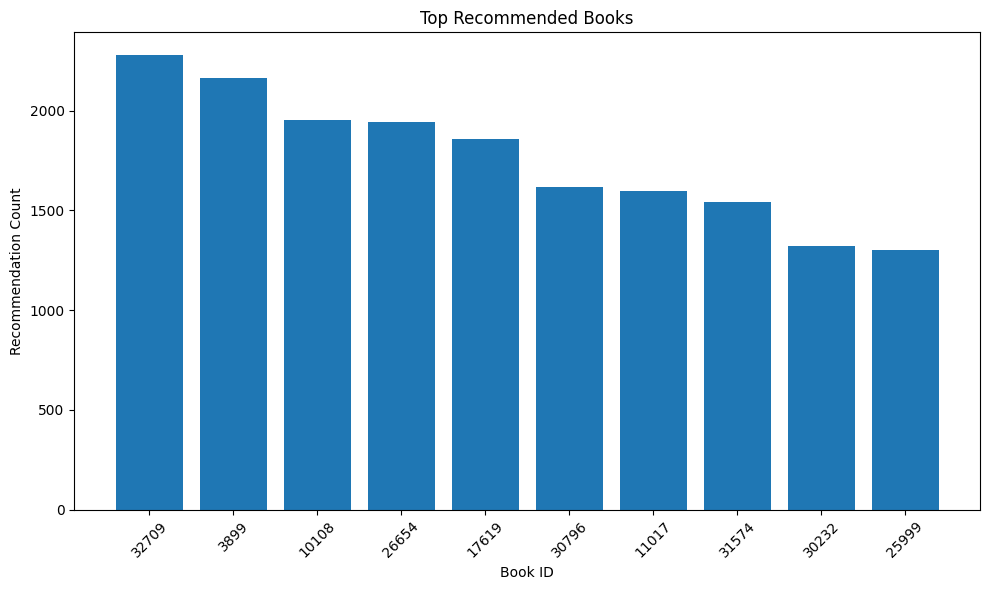

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_books.index.astype(str), top_books.values)
plt.xlabel('Book ID')
plt.ylabel('Recommendation Count')
plt.title('Top Recommended Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

One can see that some books are more recommended than others but the difference between each decreasing pair of the top 10 is not that big.

# 3. Collaborative filtering with category

This model is built on the previous one, while also adding the category feature.

In [ ]:
asin_file=f"/content/drive/MyDrive/asin_to_category.parquet"
asin_to_category = pd.read_parquet(asin_file)

In [ ]:
result_df = df_filtered.merge(asin_to_category, on='asin', how='left')

We map the category for the NN.

In [ ]:
category_to_idx = {}
categories = result_df['extracted_category'].unique()
categories_series = pd.Series(categories)

for i, category in enumerate(categories):
        category_to_idx[category] = i

In [ ]:
train_df['category_idx'] = train_df['extracted_category'].map(category_to_idx)
test_df['category_idx'] = test_df['extracted_category'].map(category_to_idx)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(
    torch.LongTensor(train_df['user_idx'].values),
    torch.LongTensor(train_df['book_idx'].values),
    torch.LongTensor(train_df['category_idx'].values),
    torch.FloatTensor(train_df['overall'].values)
)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)



In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, user_idx, book_idx, category_idx, ratings, asins, reviewer_ids):
        self.user_idx = user_idx
        self.book_idx = book_idx
        self.category_idx = category_idx  # Add category indices
        self.ratings = ratings
        self.asins = asins
        self.reviewer_ids = reviewer_ids

    def __len__(self):
        return len(self.user_idx)

    def __getitem__(self, idx):
        return (self.user_idx[idx],
                self.book_idx[idx],
                self.category_idx[idx],  # Return category index
                self.ratings[idx],
                self.asins[idx],  # Return asins as strings
                self.reviewer_ids[idx])  # Return reviewer IDs as strings

In [ ]:
category_idx_tensor_test = torch.LongTensor(test_df['category_idx'].values).to(device)

test_dataset = CustomDataset(
    user_idx_tensor_test,
    book_idx_tensor_test,
    category_idx_tensor_test,
    ratings_tensor_test,
    test_df['asin'].values,  # Pass asins as strings
    test_df['reviewerID'].values  # Pass reviewer IDs as strings
)

# DataLoader remains the same
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
class CategoryModel(nn.Module):
    def __init__(self, result_df, n_factors=5, y_range=(0, 5.5)):
        super(CategoryModel, self).__init__()
        n_users, n_books, n_categories = result_df['reviewerID'].nunique(), result_df['asin'].nunique(), result_df['extracted_category'].nunique()
        self.n_categories = n_categories
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.category_factors = nn.Embedding(n_categories, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, category_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        category_embed = self.category_factors(category_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        res = (user_embed * book_embed * category_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
model = CategoryModel(result_df).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx_batch, book_idx_batch, ratings_batch, category_idx_batch in train_loader:
        user_idx_batch = user_idx_batch.long()
        book_idx_batch = book_idx_batch.long()
        category_idx_batch = category_idx_batch.long()
        ratings_batch = ratings_batch.float()
        optimizer.zero_grad()
        pred_ratings = model(user_idx_batch, book_idx_batch, category_idx_batch).squeeze()
        loss = criterion(pred_ratings, ratings_batch)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        predicted_ratings = torch.clamp(predicted_ratings, min=1)

        correct_train_preds += torch.sum(predicted_ratings == ratings_batch).item()
        total_train_preds += len(ratings_batch)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        cf_predicted_ratings = pd.DataFrame()

        for user_idx, book_idx, category_idx, true_ratings, asin, reviewerID in test_loader:
            user_idx = user_idx.long()
            book_idx = book_idx.long()
            category_idx = category_idx.long()

            pred_ratings = model(user_idx, book_idx, category_idx).squeeze()
            loss = criterion(pred_ratings, true_ratings)
            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            predicted_ratings = torch.clamp(predicted_ratings, min=1)

            batch_df = pd.DataFrame({
                'asin': np.array(asin),  # No need to use .cpu() since asin is already a numpy array of strings
                'reviewerID': np.array(reviewerID),  # Same for reviewerID
                'true_ratings': true_ratings.cpu().numpy(),
                'pred_ratings': predicted_ratings.cpu().detach().numpy(),
                'category_idx': category_idx.cpu().numpy()  # Add category index to the DataFrame
            })

            cf_predicted_ratings = pd.concat([cf_predicted_ratings, batch_df], ignore_index=True)
            correct_test_preds += torch.sum(predicted_ratings == true_ratings).item()
            total_test_preds += len(true_ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)



# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf_with_category.pth')


In [ ]:
cf_predicted_ratings.to_csv("/content/drive/MyDrive/cf_category_predicted_ratings.csv")

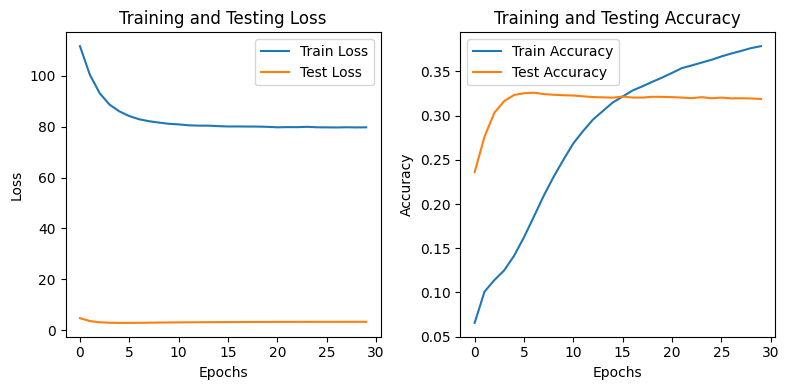

In [ ]:
plot_train_and_test_loss_accuracy()

This graphs shows that the model has poor generalization to unseen data, since we have very high loss in the train set, and very low accuracy in train set. This might indicate that the extracted category from the metadata file doesn't help us a lot. The loss of the train is extremely high.

In [ ]:
category_idx_tensor = torch.LongTensor(test_df['category_idx'].values).to(device)

model.eval()
with torch.no_grad():
    pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test, category_idx_tensor).squeeze().cpu().numpy()
true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test =  true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))

map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_category', rmse, ndcg, map_score)



Metrics:
NDCG: 0.9828
RMSE: 1.3432
MAP: 0.2011


## 4. BOW Model

This model would utilize the BOW we have extracted earlier, in order to see if it improves the prediction.

In [ ]:
df_for_bow=pd.read_csv("/content/drive/MyDrive/bow_df.csv")

Preparing the df

In [ ]:
result_df=pd.concat([df_filtered,df_for_bow],axis=1)

In [ ]:
columns_to_drop = ['Unnamed: 0', '__index_level_0__','reviewText','summary','verified','style']

result_df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
result_df.head(2)

overall      reviewerID        asin  author  best  bit  book  books  \
0        5  A3H9YD6K9TVKDP  0001713353       0     0    0     1      0   
1        5  A3QYDL5CDNYN66  0001061240       0     0    0     1      0   

   character  characters  ...  think  time  want  war  way  work  world  \
0          0           0  ...      0     0     0    0    0     0      0   
1          0           0  ...      1     0     0    0    0     0      0   

   writing  written  years  
0        0        0      0  
1        0        0      1  

[2 rows x 53 columns]

Creating the recommendation system for bow

In [ ]:
# Define the extended model
class ExtendedCollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_factors=5, n_bow_features=50, y_range=(0, 5.5)):
        super(ExtendedCollaborativeFilteringModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)

        self.book_bias = nn.Embedding(n_books, 1)
        self.bow_layer = nn.Linear(n_bow_features, 1)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, bow_features):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        bow_output = self.bow_layer(bow_features)

        res = (user_embed * book_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias + bow_output
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]


In [ ]:
n_factors = 5
n_users = result_df['reviewerID'].nunique()
n_books = result_df['asin'].nunique()
n_bow_features = result_df.shape[1] - 3  # Subtracting 'overall', 'reviewerID', 'asin'

model = ExtendedCollaborativeFilteringModel(n_users, n_books, n_factors, n_bow_features).to(device)

# Prepare training data
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

bow_features_tensor = torch.FloatTensor(train_df.drop(columns=['overall', 'reviewerID', 'asin', "user_idx", "book_idx"]).values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, bow_features_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, user_idx, book_idx, bow_features, ratings, asins, reviewer_ids):
        self.user_idx = user_idx
        self.book_idx = book_idx
        self.bow_features = bow_features  # Use BoW features instead of category indices
        self.ratings = ratings
        self.asins = asins
        self.reviewer_ids = reviewer_ids

    def __len__(self):
        return len(self.user_idx)

    def __getitem__(self, idx):
        return (self.user_idx[idx],
                self.book_idx[idx],
                self.bow_features[idx],  # Return BoW features
                self.ratings[idx],
                self.asins[idx],  # Return asins as strings
                self.reviewer_ids[idx])  # Return reviewer IDs as strings


In [ ]:
bow_features_tensor_test = torch.FloatTensor(test_df.drop(columns=['overall', 'reviewerID', 'asin', "user_idx", "book_idx"]).values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)

test_dataset = CustomDataset(
    user_idx_tensor_test,
    book_idx_tensor_test,
    bow_features_tensor_test,  # Use BoW features
    ratings_tensor_test,
    test_df['asin'].values,  # Pass asins as strings
    test_df['reviewerID'].values  # Pass reviewer IDs as strings
)

test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx, book_idx, bow_features, ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx, bow_features).squeeze()

        loss = criterion(pred_ratings, ratings)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        predicted_ratings = torch.clamp(predicted_ratings, min=1)

        correct_train_preds += torch.sum(predicted_ratings == ratings).item()
        total_train_preds += len(ratings)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    bow_predicted_ratings = pd.DataFrame()

    with torch.no_grad():
        for user_idx, book_idx, bow_features, true_ratings, asin, reviewerID in test_loader:
            user_idx = user_idx.long()
            book_idx = book_idx.long()

            pred_ratings = model(user_idx, book_idx, bow_features).squeeze()
            loss = criterion(pred_ratings, true_ratings)
            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            predicted_ratings = torch.clamp(predicted_ratings, min=1)

            batch_df = pd.DataFrame({
                'asin': np.array(asin),  # No need to use .cpu() since asin is already a numpy array of strings
                'reviewerID': np.array(reviewerID),  # Same for reviewerID
                'true_ratings': true_ratings.cpu().numpy(),
                'pred_ratings': predicted_ratings.cpu().detach().numpy(),
                'bow_features': bow_features.cpu().numpy().tolist()  # Convert bow_features to a list for DataFrame compatibility
            })

            bow_predicted_ratings = pd.concat([bow_predicted_ratings, batch_df], ignore_index=True)
            correct_test_preds += torch.sum(predicted_ratings == true_ratings).item()
            total_test_preds += len(true_ratings)


    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

In [ ]:
bow_predicted_ratings.to_csv("/content/drive/MyDrive/bow_predicted_ratings.csv")

In [ ]:
true_ratings = np.array(test_df['overall'].values)
pred_ratings = []

model.eval()
with torch.no_grad():
    for user_idx, book_idx, bow_features, ratings in test_loader:
        pred_ratings_batch = model(user_idx, book_idx, bow_features).squeeze().cpu().numpy()
        pred_ratings.extend(pred_ratings_batch)

pred_ratings = np.array(pred_ratings)

ndcg = ndcg_score([true_ratings], [pred_ratings])
rmse = mean_squared_error(true_ratings, pred_ratings, squared=False)
map_score = calculate_map(true_ratings, pred_ratings)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_bow_model', rmse, ndcg, map_score)


Metrics:
NDCG: 0.9879
RMSE: 1.2914
MAP: 0.2203


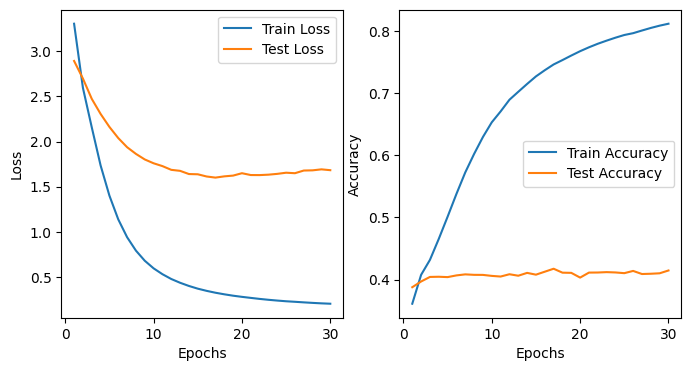

In [ ]:
plot_train_and_test_loss_accuracy()

The initial decrease in test loss and slight increase in test accuracy suggest some level of generalization. However, the plateau indicates that the model's ability to improve further on unseen data is limited. Here as well there is a gap between train and test preformances, indicating some degree of overfitting.

# Evaluating Feature Importance using SHAP Values

SHAP summary plot provides a comprehensive visualization of feature importance and their impact on the model's predictions. In the context of our work, we want to see what words will influence most on the prediction of the rating/recommendation of each user, as they are our features.

In [ ]:
import shap

class WrappedModel:
    def __init__(self, model):
        self.model = model

    def predict(self, data):
        self.model.eval()
        with torch.no_grad():
            user_idx = torch.LongTensor(data[:, 0].astype(np.int64)).to(device)
            book_idx = torch.LongTensor(data[:, 1].astype(np.int64)).to(device)
            bow_features = torch.FloatTensor(data[:, 2:].astype(np.float32)).to(device)
            return self.model(user_idx, book_idx, bow_features).cpu().numpy()

PermutationExplainer explainer: 43805it [14:29, 50.14it/s]


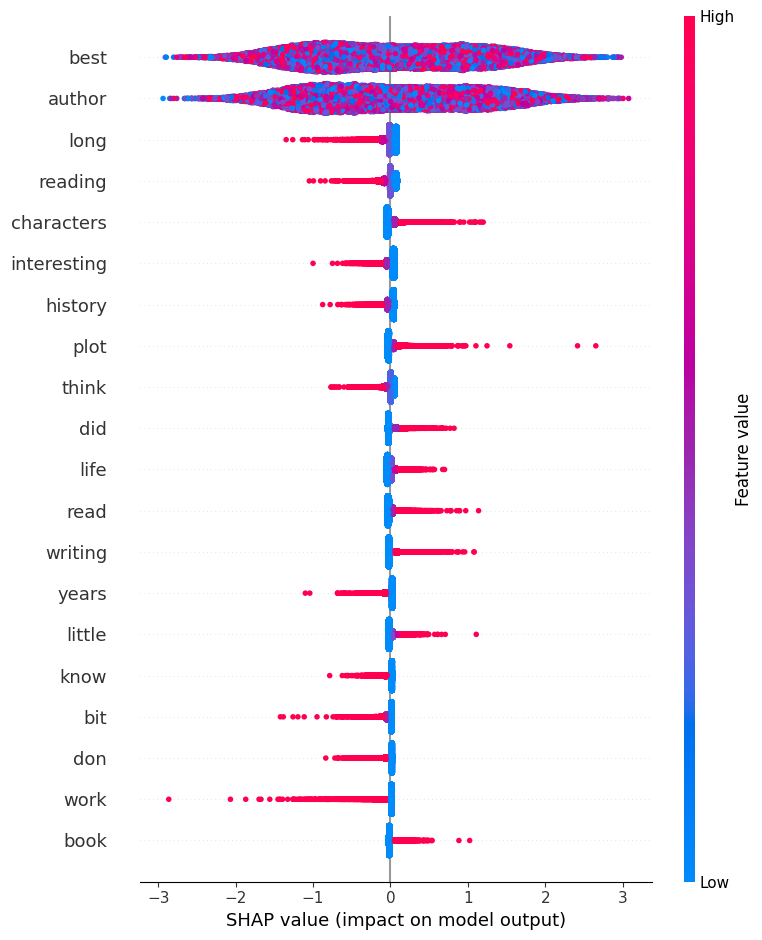

In [ ]:

test_data = np.hstack((
    test_df[['user_idx', 'book_idx']].values,
    bow_features_tensor_test.cpu().numpy()
))

wrapped_model = WrappedModel(model)

explainer = shap.Explainer(wrapped_model.predict, test_data)
shap_values = explainer(test_data)

feature_names = test_df.drop(columns=['overall', 'reviewerID', 'asin', 'user_idx', 'book_idx']).columns.tolist()

shap.summary_plot(shap_values, test_data, feature_names=feature_names)


The visualization above shows how the top textual features impact the model's output for book reviews. From the top features, we observe significant influence from the words "best" and "author," indicating their strong association with the review sentiment.

*"Best" and "Author": These features have a substantial impact on predictions, with high values contributing positively and low values contributing negatively. This suggests that mentions of "best" and "author" are closely tied to either highly positive or highly negative reviews.

*"Long" and "Interesting": These features tend to negatively impact the predictions. This might indicate that reviews mentioning the book's length or its level of interest are often critical.

*"Plot," "Characters," and "Read": These features positively influence the model's output, reflecting that positive mentions of the plot, characters, or the reading experience are associated with favorable reviews.

*"History": This feature shows a negative correlation with predictions, suggesting that historical context or books categorized under history might lead to lower satisfaction.

If we consider the broader context of book reviews, this makes sense. Features like "best" and "author" directly reflect the reader's overall impression, while aspects like "plot" and "characters" are fundamental to a book's appeal. Conversely, comments on the book's length or interest level often highlight dissatisfaction. Understanding these patterns helps us grasp the critical factors influencing reader satisfaction and the model's decision-making process.

## 5. Sentiment Model

Next we want to generate a senitment based on our features "reviewText", and "summary", working with already made models

In [ ]:
sentiment_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/combined_books_1_with_sentiment.parquet"
result_df = pd.read_parquet(sentiment_path)

In [ ]:
result_df.head()

overall      reviewerID        asin                      style  \
0        5  A3H9YD6K9TVKDP  0001713353  {'Format:': ' Hardcover'}   
1        5  A3QYDL5CDNYN66  0001061240  {'Format:': ' Hardcover'}   
2        5  A1BNWEJ7RVPLQ1  0001712799  {'Format:': ' Hardcover'}   
3        4  A3CKPNSGA7JOLK  0001712799  {'Format:': ' Hardcover'}   
4        5  A2MOBMVHECYVLE  0002006448  {'Format:': ' Hardcover'}   

   __index_level_0__ extracted_category  sentiment_category  
0                 15   Children's Books                   0  
1                 47   Children's Books                   3  
2                 72   Children's Books                   3  
3                 98   Children's Books                   3  
4                106             Travel                   3

In [ ]:
class SentimentNoCategoryModel(nn.Module):
    def __init__(self, n_users, n_books, n_sentiments=4, n_factors=5, y_range=(0, 5.5)):
        super(SentimentNoCategoryModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.sentiment_factors = nn.Embedding(n_sentiments, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, sentiment_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        sentiment_embed = self.sentiment_factors(sentiment_idx)

        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)

        res = (user_embed * book_embed * sentiment_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]

In [ ]:
train_dataset = TensorDataset(
    torch.LongTensor(train_df['user_idx'].values).to(device),
    torch.LongTensor(train_df['book_idx'].values).to(device),
    torch.LongTensor(train_df['sentiment_category'].values).to(device),
    torch.FloatTensor(train_df['overall'].values).to(device)
)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, user_idx, book_idx, sentiment_idx, ratings, asins, reviewer_ids):
        self.user_idx = user_idx
        self.book_idx = book_idx
        self.sentiment_idx = sentiment_idx  # Use sentiment indices instead of category or BoW
        self.ratings = ratings
        self.asins = asins
        self.reviewer_ids = reviewer_ids

    def __len__(self):
        return len(self.user_idx)

    def __getitem__(self, idx):
        return (self.user_idx[idx],
                self.book_idx[idx],
                self.sentiment_idx[idx],  # Return sentiment index
                self.ratings[idx],
                self.asins[idx],  # Return asins as strings
                self.reviewer_ids[idx])  # Return reviewer IDs as strings

In [ ]:

sentiment_idx_tensor_test = torch.LongTensor(test_df['sentiment_category'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)

test_dataset = CustomDataset(
    user_idx_tensor_test,
    book_idx_tensor_test,
    sentiment_idx_tensor_test,  # Use sentiment indices
    ratings_tensor_test,
    test_df['asin'].values,  # Pass asins as strings
    test_df['reviewerID'].values  # Pass reviewer IDs as strings
)

test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
# Initialize the model
n_users = result_df['reviewerID'].nunique()
n_books = result_df['asin'].nunique()
n_sentiments = 4
model = SentimentNoCategoryModel(n_users, n_books, n_sentiments).to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch in train_loader:
        user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch = user_idx_batch.to(device), book_idx_batch.to(device), sentiment_idx_batch.to(device), ratings_batch.to(device)
        optimizer.zero_grad()
        pred_ratings = model(user_idx_batch, book_idx_batch, sentiment_idx_batch).squeeze()

        loss = criterion(pred_ratings, ratings_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        predicted_ratings = torch.round(pred_ratings).long()
        correct_train_preds += torch.sum(predicted_ratings == ratings_batch).item()
        total_train_preds += len(ratings_batch)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    sentiment_predicted_ratings = pd.DataFrame()

    with torch.no_grad():
        for user_idx, book_idx, sentiment_idx, true_ratings, asin, reviewerID in test_loader:
            user_idx = user_idx.long()
            book_idx = book_idx.long()

            pred_ratings = model(user_idx, book_idx, sentiment_idx).squeeze()
            loss = criterion(pred_ratings, true_ratings)
            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number

            batch_df = pd.DataFrame({
                'asin': np.array(asin),  # No need to use .cpu() since asin is already a numpy array of strings
                'reviewerID': np.array(reviewerID),  # Same for reviewerID
                'true_ratings': true_ratings.cpu().numpy(),
                'pred_ratings': predicted_ratings.cpu().detach().numpy(),
                'sentiment_idx': sentiment_idx.cpu().numpy()  # Add sentiment index to the DataFrame
            })

            sentiment_predicted_ratings = pd.concat([sentiment_predicted_ratings, batch_df], ignore_index=True)
            correct_test_preds += torch.sum(predicted_ratings == true_ratings).item()
            total_test_preds += len(true_ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

In [ ]:
sentiment_predicted_ratings.to_csv("/content/drive/MyDrive/sentiment_predicted_ratings.csv")

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf_with_sentiment_no_category.pth')

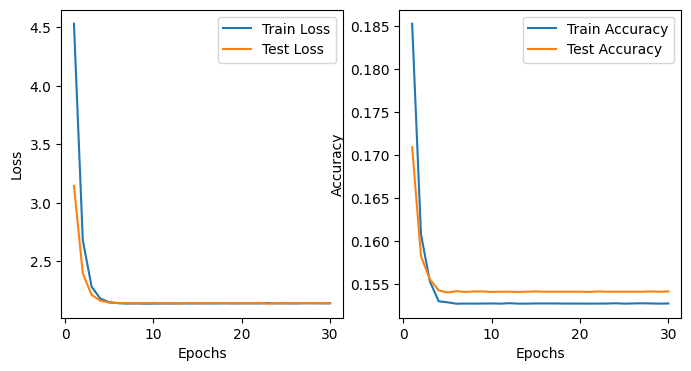

In [ ]:
plot_train_and_test_loss_accuracy()

The loss indeed improves like we have seen before, but unfortunately the accuracy of both the train and the test remains very low compared to previous models.

In [ ]:
# Evaluate the model
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
sentiment_idx_tensor_test = torch.LongTensor(test_df['sentiment_category'].values).to(device)

model.eval()
with torch.no_grad():
    pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test, sentiment_idx_tensor_test).squeeze().cpu().numpy()

true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test = true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])
rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test))
map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_sentiment_no_category', rmse, ndcg, map_score)

Metrics:
NDCG: 0.9810
RMSE: 1.2649
MAP: 0.2119


# Models Comparing

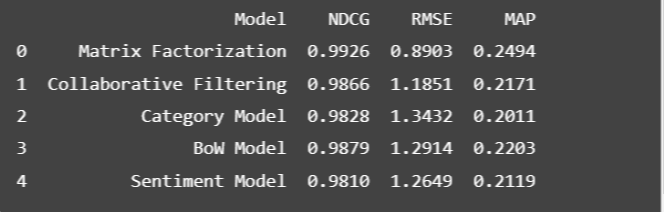

When determining the best model, we need to consider several key performance indicators: Normalized Discounted Cumulative Gain (NDCG), Root Mean Squared Error (RMSE), Mean Average Precision (MAP), Test Loss, and Accuracy.

Matrix Factorization is the best model. This model achieves the highest NDCG of 0.9926, indicating excellent ranking performance. It also has the lowest RMSE of 0.8903, showing that its predictions are closer to the actual values than those of the other models. Additionally, its MAP of 0.2494 suggests that it performs well in terms of precision across recommendations.

The BoW Model can be a second best model. While its NDCG (0.9879) and RMSE (1.2914) are slightly lower than those of Matrix Factorization, it still performs robustly across these metrics. When we look at the test loss and accuracy, the BoW model has a test loss of 1.7 and an accuracy of 0.4.

The Collaborative Filtering model shows an ok performance, but it doesn’t surpass the BoW Model.

On the other hand, the Category Model and Sentiment Model perform the worst.



# Error Analysis

To identify the most significant errors made by each model, as well as the common errors shared across all models, we will generate dataframes containing both the true ratings and the predicted ratings for each user-book pair. This will allow us to analyze and compare the performance of different models on a granular level.
We first read the ratings we have saved for each of our model, then create some pre processing, and then rename the columns in order to make a compraison across each record:

In [ ]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/sentiment_predicted_ratings.csv')
bow_df = pd.read_csv('/content/drive/MyDrive/bow_predicted_ratings.csv')
cf_category_df = pd.read_csv('/content/drive/MyDrive/cf_category_predicted_ratings.csv')
cf_df = pd.read_csv('/content/drive/MyDrive/cf_predicted_ratings.csv')
blant_errors_mf_df = pd.read_csv('/content/drive/MyDrive/blant_errors_mf.csv')

#removing unnamed colomns, colomns that are not relevent for the prediction and true rating from all but the first, making them able to merge
entiment_df = sentiment_df.drop(columns=[col for col in sentiment_df.columns if 'Unnamed' in col or col == 'sentiment_idx'])
bow_df = bow_df.drop(columns=[col for col in bow_df.columns if 'Unnamed' in col or col == 'true_ratings' or col == 'bow_features'])
cf_category_df = cf_category_df.drop(columns=[col for col in cf_category_df.columns if 'Unnamed' in col or col == 'true_ratings' or col == 'category_idx'])
cf_df = cf_df.drop(columns=[col for col in cf_df.columns if 'Unnamed' in col or col == 'true_ratings'])
blant_errors_mf_df = blant_errors_mf_df.drop(columns=[col for col in blant_errors_mf_df.columns if 'Unnamed' in col or col == 'True Rating'])

# Rename the pred_rating column in each dataframe to have unique names
sentiment_df = sentiment_df.rename(columns={"pred_ratings": "sentiment_pred_rating"})
bow_df = bow_df.rename(columns={"pred_ratings": "bow_pred_rating"})
cf_category_df = cf_category_df.rename(columns={"pred_ratings": "cf_category_pred_rating"})
cf_df = cf_df.rename(columns={"pred_ratings": "cf_pred_rating"})
blant_errors_mf_df = blant_errors_mf_df.rename(columns={"pred_ratings": "blant_errors_mf_pred_rating"})

# Merging all dataframes on 'reviewerID' and 'asin'
merged_df = sentiment_df.merge(
    bow_df, on=['reviewerID', 'asin'], how='inner') \
                        .merge(cf_category_df,
                               on=['reviewerID', 'asin'], how='inner') \
                        .merge(cf_df,
                               on=['reviewerID', 'asin'], how='inner')


To pinpoint the most significant errors—those where the prediction gap is 2 or more—we focus on cases where the difference between the true rating and the predicted rating is large enough to represent a major discrepancy in user satisfaction (e.g., between liking and disliking a book).

In [ ]:
filtered_df = merged_df[
    (abs(merged_df['true_ratings'] - merged_df['sentiment_pred_rating']) >= 2) &
    (abs(merged_df['true_ratings'] - merged_df['bow_pred_rating']) >= 2) &
    (abs(merged_df['true_ratings'] - merged_df['cf_category_pred_rating']) >= 2) &
    (abs(merged_df['true_ratings'] - merged_df['cf_pred_rating']) >= 2)
]

In [ ]:
filtered_df

Unnamed: 0        asin      reviewerID  true_ratings  \
44           192  0061343811  A3G7BEJJCPD6DS           2.0   
64           244  0060392827  A2INX8B6VXUVW6           5.0   
77           304  0140180346   AOOZD3SGGDXUT           2.0   
88           349  0062318322  A1ZT51CDKQ5CWF           2.0   
118          503  006065337X  A1NIEIENEWXCCQ           2.0   
...          ...         ...             ...           ...   
7200       30837  006074815X   AG212WE6M4O5D           3.0   
7363       31529  0316026697   AL5RP8DS1NUV3           1.0   
7374       31589  0131467506  A3JPFWKS83R49V           3.0   
7381       31615  0060590270  A12FPG5P7T0IMA           1.0   
7437       31859  0307346609  A3KPJ1MOGTZVGC           2.0   

      sentiment_pred_rating  sentiment_idx  bow_pred_rating  \
44                        5              0                5   
64                        3              3                2   
77                        5              0                4   
88                        5              0                4   
118                       4              3                5   
...                     ...            ...              ...   
7200                      5              1                5   
7363                      4              0                3   
7374                      5              0                5   
7381                      3              0                3   
7437                      4              0                4   

      cf_category_pred_rating  cf_pred_rating  
44                          5               4  
64                          3               3  
77                          4               4  
88                          5               4  
118                         5               5  
...                       ...             ...  
7200                        5               5  
7363                        3               3  
7374                        5               5  
7381                        4               3  
7437                        5               4  

[193 rows x 9 columns]

In [ ]:
filtered_df["true_ratings"].value_counts()

true_ratings
1.0    70
2.0    53
3.0    53
5.0    17
Name: count, dtype: int64

At the beginning of the project, we observed that users tend to give higher ratings more frequently, which could cause models to develop a bias toward predicting higher ratings.
This bias likely contributes to the higher number of blatant errors at the lower end of the rating scale (e.g., 1.0 and 2.0), where the models might incorrectly predict higher ratings.
The models make fewer errors with a true rating of 5.0, which aligns with the tendency of models to predict higher ratings more frequently, potentially due to the skewed distribution of user ratings.

**Identifying Books with the Most Prediction Errors**

To understand which books are contributing most to the prediction errors, especially the blatant errors (where the prediction gap is 2 or more), we can analyze the dataset to find the books with the highest number of such errors.

In [ ]:
filtered_df['asin'].value_counts()[filtered_df['asin'].value_counts() > 1]

asin
0297859382    2
0060889357    2
0141029455    2
Name: count, dtype: int64

We drill down on one result to see if we can learn anything from it.

In [ ]:
filtered_df[filtered_df['asin']=='0297859382']

asin     reviewerID  true_ratings  sentiment_pred_rating  \
929   0297859382  AZULU4TOTOLEU           1.0                      4   
6628  0297859382  AY8FI73B2HWXB           2.0                      4   

      sentiment_idx  bow_pred_rating  \
929               0                5   
6628              1                4   

                                           bow_features  \
929   [0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6628  [0.0, 1.0, 0.0, 13.0, 9.0, 0.0, 1.0, 0.0, 1.0,...   

      cf_category_pred_rating  category_idx  cf_pred_rating  
929                         5            11               5  
6628                        5            11               4

In [ ]:
df_filtered[(df_filtered['asin'] == '0297859382') & (df_filtered['reviewerID'] == 'AZULU4TOTOLEU')]


Unnamed: 0  overall  verified     reviewerID        asin  \
92542     2588265        1     False  AZULU4TOTOLEU  0297859382   

                           style  \
92542  {'Format:': ' Paperback'}   

                                              reviewText  \
92542  I like the story this book tells, but NOT the ...   

                       summary  __index_level_0__  
92542  Wish this book was gone            2629306

In [ ]:
df_filtered[(df_filtered['asin'] == '0297859382') & (df_filtered['reviewerID'] == 'AY8FI73B2HWXB')]

Unnamed: 0  overall  verified     reviewerID        asin  \
94851     2659199        2      True  AY8FI73B2HWXB  0297859382   

                           style  \
94851  {'Format:': ' Paperback'}   

                                              reviewText  \
94851  BE ADVISED - SOME SPOILERS.  I loved Dark Plac...   

                              summary  __index_level_0__  
94851  Gillian Flynn - WORST BOOK YET            2700821

The analysis of reviews for a book with significant prediction errors reveals that the reviews contain complex and somewhat contradictory sentiments, which likely contribute to the models' difficulties in making accurate predictions.

First Review: The reviewer mentions, "I like the story this book tells," yet the rating given is only 1. This positive statement is at odds with the low rating, making it challenging for the model to predict such a low score.
Second Review: The reviewer states, "I loved Dark Places, and I loved Sharp Objects," but gives the book a rating of 2. Despite expressing love for the author's previous works, the low rating suggests dissatisfaction with this particular book, which the model may struggle to interpret correctly.

These reviews exhibit complex sentiment that doesn't align straightforwardly with the ratings. Positive language in a review with a low rating can mislead the model, which often relies on sentiment analysis or textual features to predict ratings.
Models trained on simpler patterns where positive sentiments correlate with higher ratings might misinterpret these nuanced reviews, leading to larger prediction errors.

The presence of complicated and contradictory sentiments in reviews, such as positive comments paired with low ratings, presents a significant challenge for prediction models. Understanding this complexity can guide improvements in the models, such as incorporating more sophisticated sentiment analysis techniques or additional context, to better handle nuanced or mixed reviews. This insight underscores the importance of considering the full context of a review, rather than relying solely on sentiment, to make more accurate predictions.

**Analyzing User Reviews with the Most Significant Prediction Errors**

Now, we will analyze the user's reviews that caused the most significant prediction errors in our models.

In [ ]:
filtered_df['reviewerID'].value_counts()[filtered_df['reviewerID'].value_counts() > 1]

reviewerID
A3H9YD6K9TVKDP    3
A3G7BEJJCPD6DS    2
AG212WE6M4O5D     2
A2983OP6MDZ1M1    2
A1BNWEJ7RVPLQ1    2
A5TZXWU8AALIC     2
A3SHHE8ZUDCMR1    2
A1CO8STECR9G9F    2
A1BKMYEQ6BP5B5    2
A22X0C3YXAS04L    2
A3CKPNSGA7JOLK    2
A32VWSQ0FPZKZ3    2
A2D37EP9KT2E3D    2
Name: count, dtype: int64

We again drill down to see if we can learn anything.

In [ ]:
filtered_df[filtered_df['reviewerID']=='A3H9YD6K9TVKDP']

asin      reviewerID  true_ratings  sentiment_pred_rating  \
441   0307269183  A3H9YD6K9TVKDP           1.0                      4   
5408  0140502882  A3H9YD6K9TVKDP           5.0                      2   
6083  0007173989  A3H9YD6K9TVKDP           1.0                      5   

      sentiment_idx  bow_pred_rating  \
441               0                3   
5408              3                3   
6083              0                3   

                                           bow_features  \
441   [1.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 2.0, 1.0, ...   
5408  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6083  [1.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

      cf_category_pred_rating  category_idx  cf_pred_rating  
441                         5             6               5  
5408                        1             0               1  
6083                        5             9               5

In [ ]:
df_filtered[(df_filtered['asin'] == '0307269183') & (df_filtered['reviewerID'] == 'A3H9YD6K9TVKDP')]

Unnamed: 0  overall  verified      reviewerID        asin  \
93627     2632722        1      True  A3H9YD6K9TVKDP  0307269183   

                           style  \
93627  {'Format:': ' Paperback'}   

                                              reviewText  \
93627  The front interior blurb encompasses part of t...   

                              summary  __index_level_0__  
93627  Not Convincing from the Outset            2674165

As we can see from the previous review, the user reviewText is a bit complicated, making both humans and AI models not sure what they tried to say. The next review, shows that the user even wrote a book summary rather than opinion on the book itself:

In [ ]:
df_filtered[(df_filtered['asin'] == '0140502882') & (df_filtered['reviewerID'] == 'A3H9YD6K9TVKDP')]

Unnamed: 0  overall  verified      reviewerID        asin  \
63648     1834874        5     False  A3H9YD6K9TVKDP  0140502882   

                           style  \
63648  {'Format:': ' Paperback'}   

                                              reviewText  \
63648  Norman secretly works and lives at the art mus...   

                    summary  __index_level_0__  
63648  A Mouse Who Love Art            1865299

Because the available data consists of ratings, review texts, and summaries, we must rely solely on these. Consequently, when attempting to characterize mistakes, we find that users' review texts and summaries might be more complected than a straight-forward review. The text can also be lengthy and present an ambivalent opinion, leading to contradictions if a study examines only the first 510 tokens or attempts to compare the review to the rating.

# Future work and improvement ideas


1.   Despite instructing the BOW model to ignore stop words, it still learned some of them. A more effective approach could involve creating a custom stop words filter to ensure these words are properly excluded.
2.   We can try larger number of features in the BOW model. Experimenting with different feature counts could help improve model performance and reduce overfitting.
3. We can involve creating clusters based on individual users, which might lead to more personalized and effective recommendations across models.

4. Develop a recommendation system focused on specific genres, like fiction, rather than attempting to cover all genres, which could result in more accurate and relevant suggestions.

5. Dividing users according to their preferred genres, such as recommending only travel books to users who primarily read travel literature, could enhance the relevance of the recommendations provided.

6. As we saw through the project, we have many more 4 and 5 star rating values in the "overall" column, and way less 1 and 2 values. In order to gain a higher accuracy, we can modify the dataset, making it more balanced, either by generating synthetic data, or sampling only few of the 4,5-star ratings.

7. We saw that we have a bit of overfiting in our networks, and adding L2 regularization didn't solve the problem. This might indicate that our networks didn't learn the complexity of the data, and other regularization techniques would improve the network, as well as creating more complexed networks, with deeper architecture.



# Concluding Remarks

Working with a large dataset presented significant challenges throughout the project. We encountered several learning moments that, in hindsight, could have streamlined our process for future endeavors. For example, we discovered the importance of working with batches of data rather than processing everything at once. Conducting the EDA without fully understanding the meaning of each column led to repeated analysis, which was time-consuming. We also learned that using Colab for an extended project can be challenging due to session timeouts and RAM limitations, despite subscribing to Colab Pro. After comparing it with Kaggle, we found that Colab offered more resources for our needs, but we still frequently hit performance limitations, especially when initially trying to process a vast number of reviews. Eventually, we restricted our analysis to users with only 50-100 reviews to avoid crashes.

In retrospect, creating our own dataset through web scraping might have been a better approach than using an existing one, but this experience provided valuable real-world preparation. We ended the project somewhat frustrated because the clustering and dimension reduction methods did not yield satisfactory results. Additionally, we now believe that using deeper neural networks might have improved our performance.

Ultimately, working on recommendation systems has been a fascinating experience, revealing just how much there is to learn and explore. We feel that we've only scratched the surface. Due to computational constraints, we focused on developing an item-based recommendation system rather than a user-based one. It would have been exciting to explore user-based recommendations if we had more computational power.